## 📦 Importación de librerías

Se importan todas las librerías necesarias para el preprocesamiento de datos, entrenamiento de modelos de machine learning, evaluación de métricas, visualización y explicabilidad con SHAP.


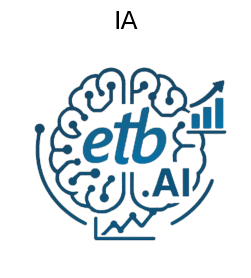

In [5]:
# Importamos las librerías necesarias para preprocesamiento y modelado
import pandas as pd
import numpy as np
import joblib
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix, precision_score, recall_score, RocCurveDisplay
from sklearn.model_selection import cross_validate

import matplotlib.pyplot as plt
import shap
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Cargar y mostrar imagen
img = mpimg.imread('../Assets/logo.png')
plt.figure(figsize=(6, 3))  # Tamaño grande
plt.imshow(img)
plt.axis('off')  # Oculta ejes
plt.title("IA", fontsize=18)
plt.show()


## 📁 Carga de datos

Se carga la configuración desde un archivo JSON para obtener la ruta del dataset. Luego, se lee el archivo CSV con `pandas` y se visualizan las primeras 10 filas del conjunto de datos.


In [2]:
# Ruta al archivo de configuración
config_path = '../Configuracion/config.json'

# Cargar configuración desde el archivo JSON
with open(config_path) as f:
    config = json.load(f)

# Obtener la ruta del CSV desde el JSON
data_path = config['data_path']

# Cargar el CSV con pandas
data = pd.read_csv(data_path)

# Mostrar primeras filas
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


## ℹ️ Información general del dataset

Se muestra un resumen del dataset, incluyendo el número de entradas, tipos de datos y cantidad de valores no nulos por columna.


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 📊 Estadísticas descriptivas

Se presentan estadísticas descriptivas de todas las columnas, incluyendo medidas como la media, desviación estándar, valores mínimos, máximos y frecuencias para variables categóricas.


In [4]:
data.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


## 🧹 Detección y limpieza de valores vacíos

Se identifican y reemplazan los valores vacíos (espacios en blanco) en columnas de tipo `object` por `NaN`, para tratarlos posteriormente. Luego, se imprime un resumen de valores nulos por columna.

In [5]:
# Recorremos todas las columnas tipo 'object'
for col in data.columns:
    if data[col].dtype == 'object':
        # Contamos valores vacíos (espacios en blanco)
        vacios = data[data[col].str.strip() == ''].shape[0]
        if vacios > 0:
            print(f"- {col}: {vacios} valores vacíos encontrados")
            # Reemplazamos los valores vacíos por np.nan
            data[col] = data[col].replace(r'^\s*$', np.nan, regex=True)

# Mostramos resumen de nulos luego del reemplazo
print("\n📊 Valores nulos por columna:")
print(data.isnull().sum())


- TotalCharges: 11 valores vacíos encontrados

📊 Valores nulos por columna:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


## 🧼 Eliminación de registros con valores nulos

Se detectan las columnas que contienen valores nulos y se eliminan las filas que los contienen para garantizar la calidad del conjunto de datos. Se muestra el nuevo tamaño del dataset resultante.


In [6]:
# Detectar columnas con valores nulos
columnas_con_nulos = data.columns[data.isnull().any()].tolist()

print("Columnas con nulos detectadas:")
for col in columnas_con_nulos:
    print(f"- {col}: {data[col].isnull().sum()} nulos")

# Eliminar filas con nulos en esas columnas
data = data.dropna(subset=columnas_con_nulos)

print(f"\n Filas con nulos eliminadas. Dataset final: {data.shape[0]} filas, {data.shape[1]} columnas.")


Columnas con nulos detectadas:
- TotalCharges: 11 nulos

 Filas con nulos eliminadas. Dataset final: 7032 filas, 21 columnas.


## 🔄 Conversión automática de tipos de datos

Se intenta convertir las columnas de tipo `object` a tipos más apropiados. Primero se prueba la conversión a formato numérico, y si no es posible, se intenta convertir a formato de fecha. Se muestran los cambios realizados.


In [7]:
print("Intentando convertir columnas 'object' a su tipo correcto...\n")

tipos_antes = data.dtypes.copy()

for col in data.select_dtypes(include='object').columns:
    try:
        # Intentamos convertir a numérico
        data[col] = pd.to_numeric(data[col])
    except:
        # Si no es numérico, probamos si podría ser fecha (sólo si hay al menos 1 valor con patrón de fecha)
        muestra = data[col].dropna().astype(str).head(10)
        if muestra.str.contains(r'\d{4}-\d{2}-\d{2}|\d{2}/\d{2}/\d{4}').any():
            try:
                data[col] = pd.to_datetime(data[col], errors='raise')
            except:
                pass  # si no se puede, se deja como está

tipos_despues = data.dtypes
cambios = tipos_antes[tipos_antes != tipos_despues]

if not cambios.empty:
    print("Se cambiaron los tipos de las siguientes columnas:\n")
    for col in cambios.index:
        print(f"- {col}: {tipos_antes[col]} → {tipos_despues[col]}")
else:
    print("No fue necesario cambiar ningún tipo de dato.")


Intentando convertir columnas 'object' a su tipo correcto...

Se cambiaron los tipos de las siguientes columnas:

- TotalCharges: object → float64


## 📋 Revisión general del dataset

Se muestra información general del conjunto de datos (`data.info()`), incluyendo tipos de datos y cantidad de valores no nulos por columna, así como estadísticas descriptivas de todas las variables (`data.describe(include='all')`).


In [8]:
data.info()
data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032,7032,7032.000000,7032,7032,7032.000000,7032,7032,7032,7032,...,7032,7032,7032,7032,7032,7032,7032,7032.000000,7032.000000,7032
unique,7032,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,NaN,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3549,NaN,3639,4933,NaN,6352,3385,3096,3497,...,3094,3472,2809,2781,3875,4168,2365,NaN,NaN,5163
mean,NaN,NaN,0.162400,NaN,NaN,32.421786,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.798208,2283.300441,NaN
std,NaN,NaN,0.368844,NaN,NaN,24.545260,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.085974,2266.771362,NaN
min,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.587500,401.450000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.862500,3794.737500,NaN


## 🥧 Análisis de la variable objetivo

Se carga la configuración desde el archivo JSON y se obtiene la variable objetivo.  
Luego, se visualiza la distribución de clases de dicha variable (`Churn`) mediante un gráfico de torta y se imprime su distribución porcentual. Esto permite conocer el balance o desbalance de clases en el conjunto de datos.

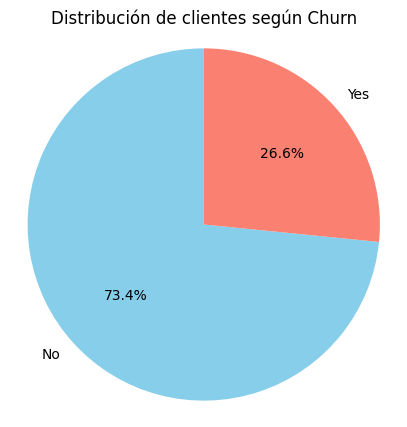


Porcentaje de Churn:
Churn
No     73.4215
Yes    26.5785
Name: proportion, dtype: float64


In [9]:
# Cargar configuración desde archivo JSON
with open("../Configuracion/config.json", "r") as f:
    config = json.load(f)

# Leer variables desde el JSON
target_variable = config.get("target_variable", "Churn")  # default a 'Churn' si no está
output_folder = config.get("output_folder", "./visuals")

# Conteo de valores únicos en la variable objetivo
churn_counts = data[target_variable].value_counts()

# Gráfico circular (torta)
plt.figure(figsize=(5, 5))
plt.pie(
    churn_counts,
    labels=churn_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'salmon']
)
plt.title(f'Distribución de clientes según {target_variable}')
plt.axis('equal')  # Para que el círculo no se vea ovalado
plt.savefig(os.path.join(output_folder, f'Diagrama Torta de la Variable {target_variable}.png'), dpi=300)
plt.show()

# Porcentajes
print(f"\nPorcentaje de {target_variable}:")
print(data[target_variable].value_counts(normalize=True).round(6) * 100)


## 🧹 Eliminación de columnas tipo ID

Se identifican y eliminan columnas que parecen ser identificadores únicos, ya que no aportan valor predictivo al modelo.  
Estas columnas generalmente contienen valores distintos para cada fila o incluyen la palabra "id" en su nombre.

In [10]:
# Buscamos columnas que parecen ser identificadores únicos
id_cols = []

for col in data.columns:
    if ("id" in col.lower()) or (data[col].nunique() == data.shape[0]):
        id_cols.append(col)

# Eliminamos las columnas identificadas como ID
if id_cols:
    data.drop(columns=id_cols, inplace=True)
    print(f"Columnas identificadas como ID y eliminadas: {id_cols}")
else:
    print("No se encontraron columnas tipo ID para eliminar.")


Columnas identificadas como ID y eliminadas: ['customerID']


## 🔍 Identificación de variables categóricas y numéricas

Se clasifican las columnas del dataset en:

- **Variables categóricas**: aquellas de tipo `object` o que tienen solo 2 valores únicos (binarias numéricas).
- **Variables numéricas**: columnas numéricas reales que no son binarias ni la variable objetivo.

Esto es fundamental para definir estrategias de codificación y escalado más adelante.


In [11]:
print("📊 Tipos de datos en el dataset:\n")
print(data.dtypes)

# Identificamos variables categóricas puras
categorical_cols = data.select_dtypes(include='object').columns.tolist()

# Detectamos variables binarias numéricas (como SeniorCitizen)
binarias_numericas = [
    col for col in data.select_dtypes(include=['int64', 'float64']).columns
    if data[col].nunique() <= 2 and col != target_variable
]

# Agregamos las binarias categóricas al grupo de categóricas
categorical_cols += binarias_numericas

# Eliminamos duplicados (por si acaso)
categorical_cols = list(set(categorical_cols))

# Removemos la variable objetivo de ambas listas
if target_variable in categorical_cols:
    categorical_cols.remove(target_variable)

# Variables numéricas reales (excluyendo binarias)
numeric_cols = [
    col for col in data.select_dtypes(include=['int64', 'float64']).columns
    if col not in categorical_cols and col != target_variable
]

# Mostramos resultados
print("\n📌 Variables categóricas:")
print(categorical_cols)

print("\n📌 Variables numéricas:")
print(numeric_cols)

📊 Tipos de datos en el dataset:

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

📌 Variables categóricas:
['TechSupport', 'OnlineBackup', 'SeniorCitizen', 'StreamingTV', 'PaymentMethod', 'PaperlessBilling', 'Partner', 'Contract', 'gender', 'InternetService', 'DeviceProtection', 'OnlineSecurity', 'PhoneService', 'MultipleLines', 'StreamingMovies', 'Dependents']

📌 Variables numéricas:
['tenure', 'MonthlyCharges', 'TotalCharges']


## 📊 Identificación y tratamiento de outliers

En esta celda se realiza lo siguiente:

1. **Identificación de outliers**: Utilizamos el método del rango intercuartílico (IQR) para detectar valores extremos en las columnas numéricas.
2. **Recorte de outliers**: Los valores que caen fuera de los límites calculados (1.5 veces el IQR por debajo del primer cuartil o por encima del tercer cuartil) se "recortan" a esos límites.
3. **Resumen de outliers**: Se guarda un resumen con el número de outliers detectados, el porcentaje sobre el total de datos y los límites inferiores y superiores para cada variable.

Este paso ayuda a mejorar la calidad de los datos y evitar que los outliers influyan negativamente en los modelos.


In [12]:
resumen_outliers = {}

for col in numeric_cols:  # Solo columnas numéricas (int y float)
    Q1 = data[col].quantile(0.25)   # Primer cuartil
    Q3 = data[col].quantile(0.75)   # Tercer cuartil
    IQR = Q3 - Q1                   # Rango intercuartílico

    lim_inf = Q1 - 1.5 * IQR        # Límite inferior para detectar outliers
    lim_sup = Q3 + 1.5 * IQR        # Límite superior

    # Identificamos los outliers
    outliers = data[(data[col] < lim_inf) | (data[col] > lim_sup)]
    total_outliers = len(outliers)
    porcentaje = round(total_outliers / data.shape[0] * 100, 2)

    print(f"🔎 {col}: {total_outliers} outliers ({porcentaje}%)")

    # Recortamos valores extremos (cap) a los límites
    data[col] = np.clip(data[col], lim_inf, lim_sup)

    # Guardamos resumen
    resumen_outliers[col] = {
        "total": total_outliers,
        "porcentaje": porcentaje,
        "lim_inf": lim_inf,
        "lim_sup": lim_sup
    }


🔎 tenure: 0 outliers (0.0%)
🔎 MonthlyCharges: 0 outliers (0.0%)
🔎 TotalCharges: 0 outliers (0.0%)


## 🔍 Análisis de variables categóricas

En esta celda se realiza el análisis y visualización de las variables categóricas del dataset:

1. **Visualización de la distribución de cada variable categórica**: Para cada variable categórica, se genera un gráfico de barras que muestra la cantidad de observaciones por cada categoría.
2. **Distribución porcentual**: Se calcula y muestra la distribución porcentual de los valores de cada variable categórica, lo que ayuda a entender la frecuencia relativa de cada categoría en el conjunto de datos.

Este análisis es fundamental para comprender la distribución de las categorías y detectar posibles desequilibrios en las clases.


🔍 Análisis de variables categóricas:



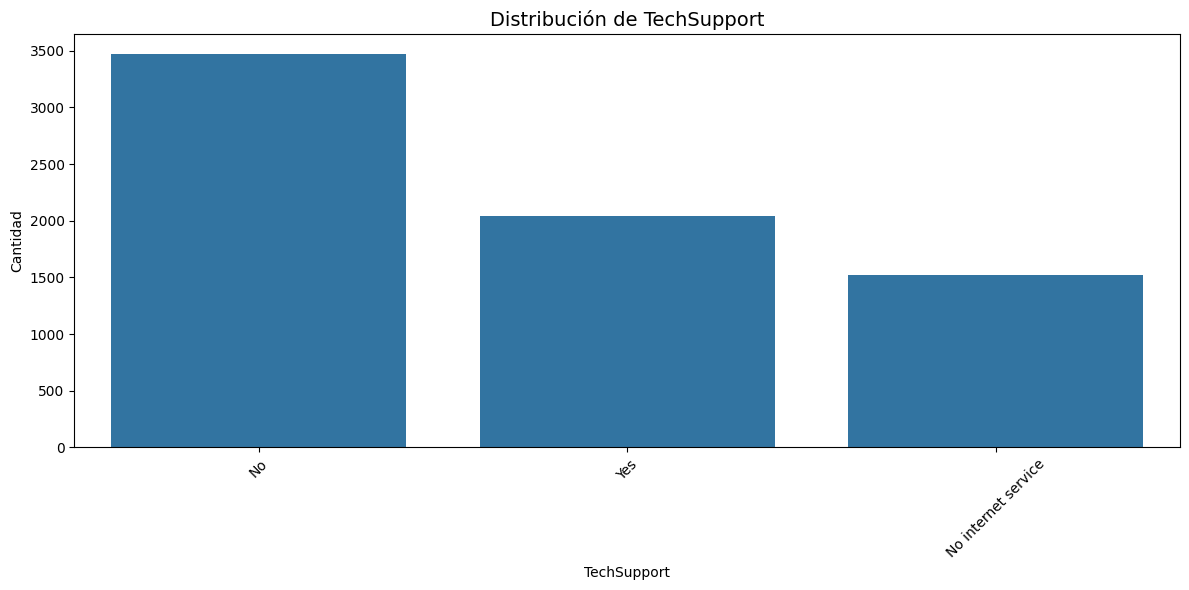


📊 Distribución porcentual de 'TechSupport':
TechSupport
No                     49.37 %
Yes                    29.01 %
No internet service    21.62 %
Name: proportion, dtype: object
--------------------------------------------------


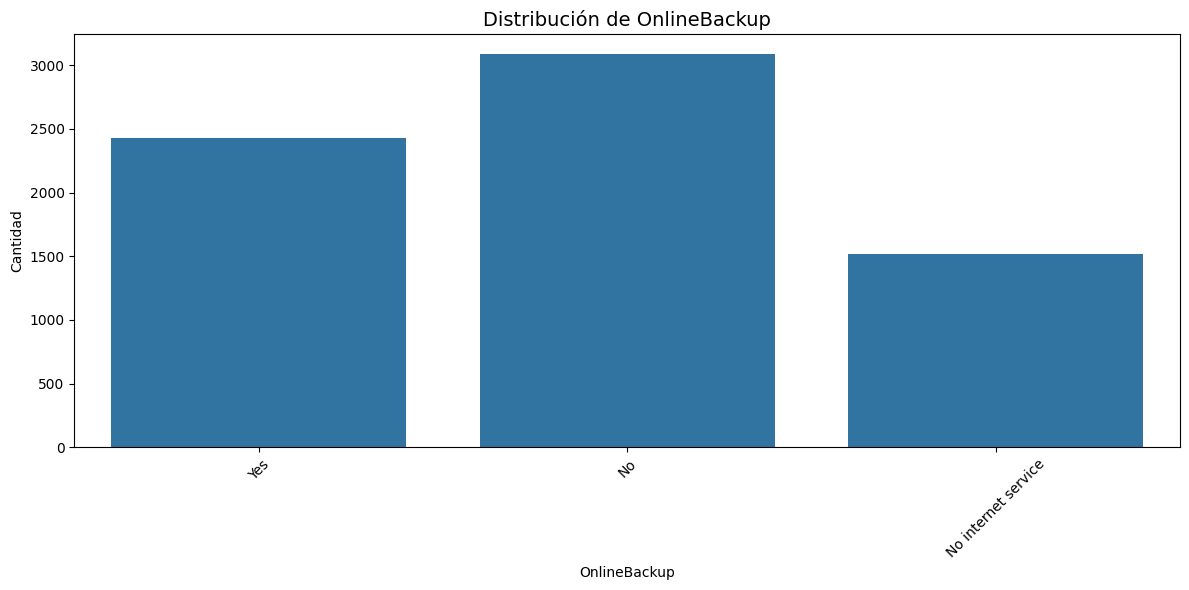


📊 Distribución porcentual de 'OnlineBackup':
OnlineBackup
No                      43.9 %
Yes                    34.49 %
No internet service    21.62 %
Name: proportion, dtype: object
--------------------------------------------------


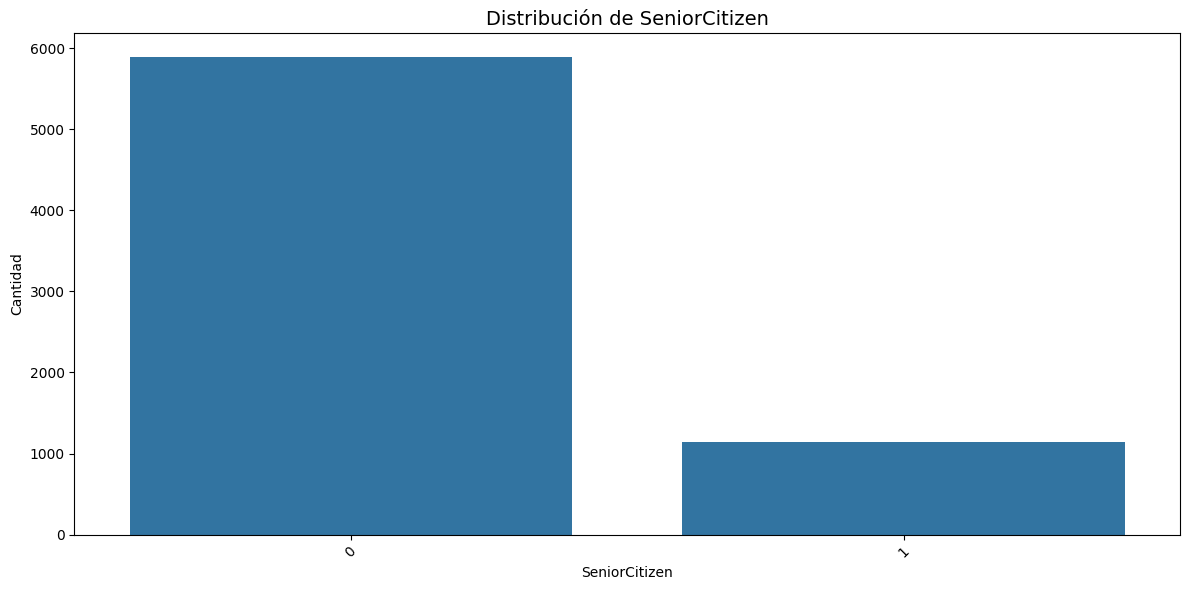


📊 Distribución porcentual de 'SeniorCitizen':
SeniorCitizen
0    83.76 %
1    16.24 %
Name: proportion, dtype: object
--------------------------------------------------


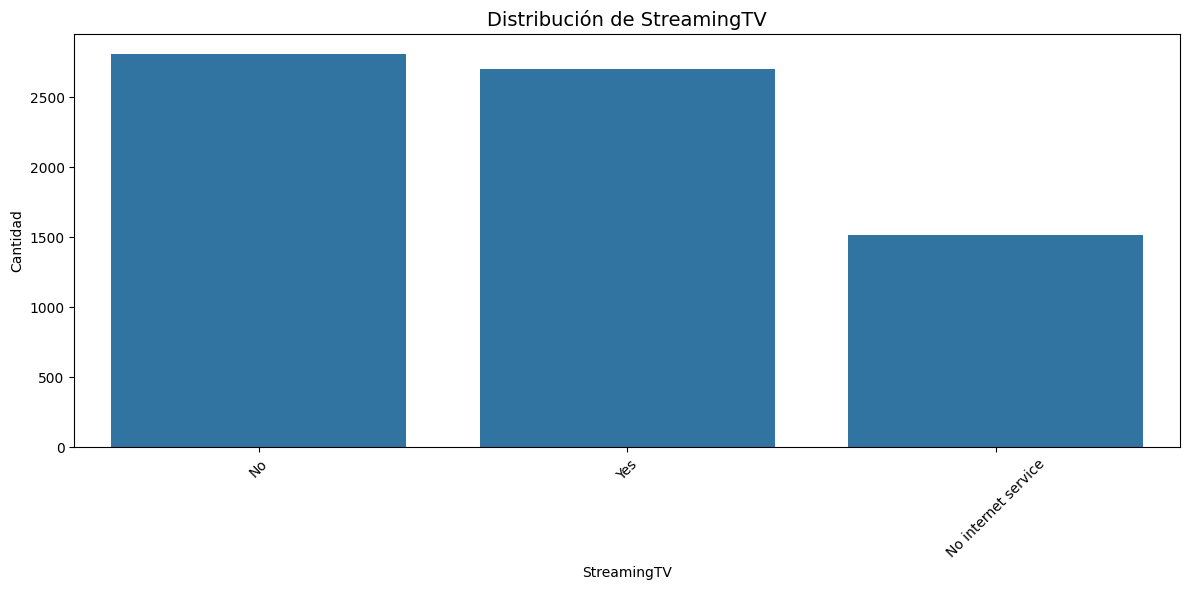


📊 Distribución porcentual de 'StreamingTV':
StreamingTV
No                     39.95 %
Yes                    38.44 %
No internet service    21.62 %
Name: proportion, dtype: object
--------------------------------------------------


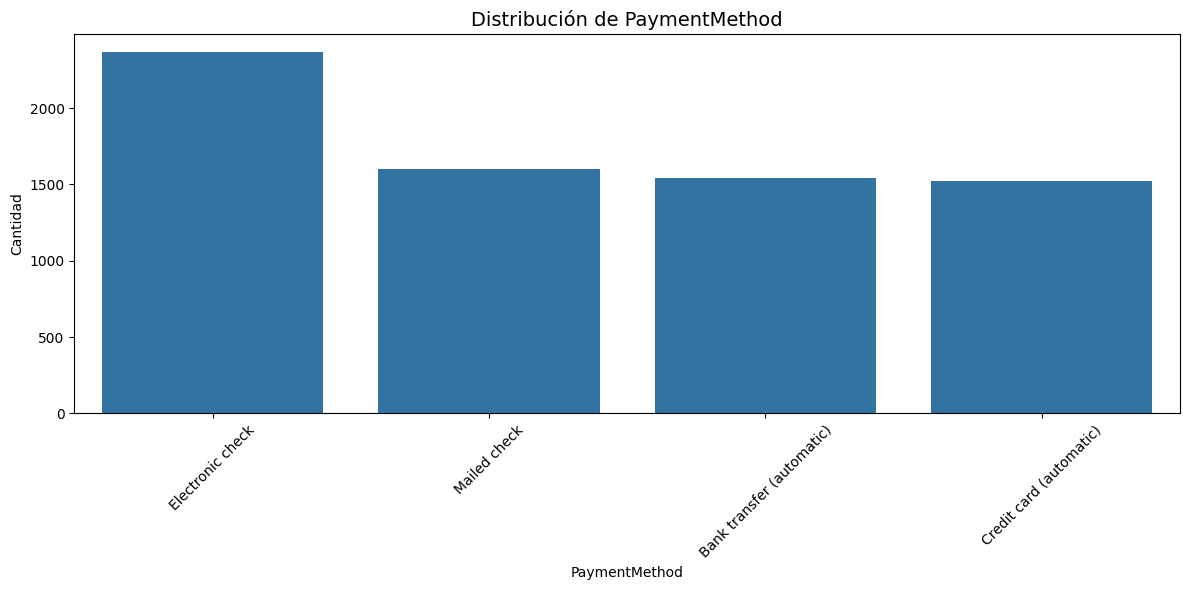


📊 Distribución porcentual de 'PaymentMethod':
PaymentMethod
Electronic check             33.63 %
Mailed check                 22.81 %
Bank transfer (automatic)    21.93 %
Credit card (automatic)      21.63 %
Name: proportion, dtype: object
--------------------------------------------------


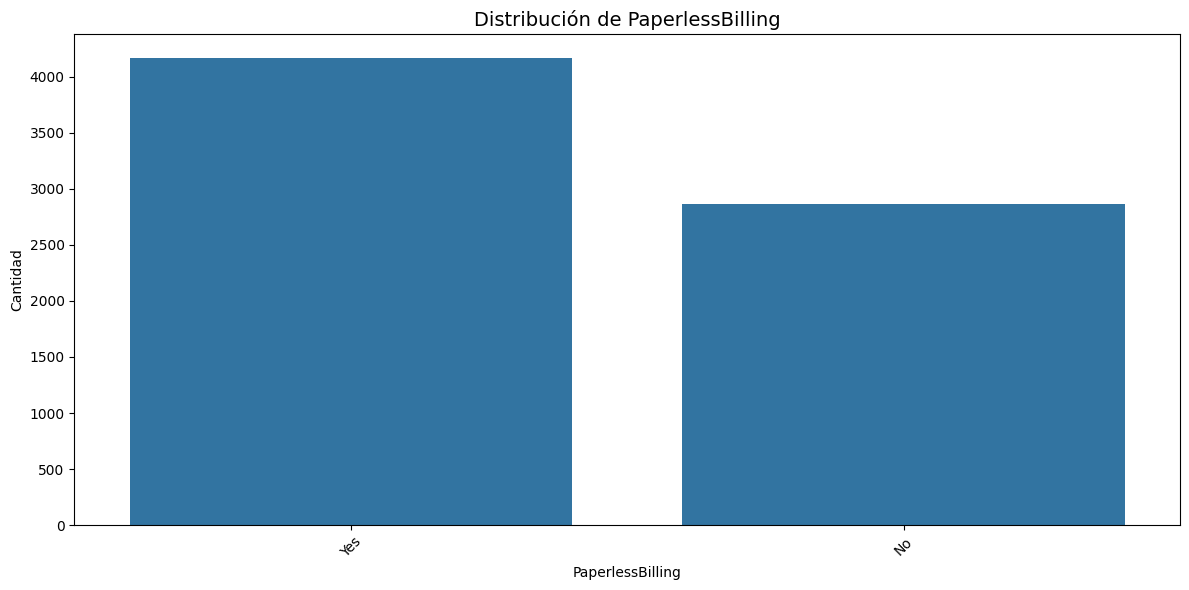


📊 Distribución porcentual de 'PaperlessBilling':
PaperlessBilling
Yes    59.27 %
No     40.73 %
Name: proportion, dtype: object
--------------------------------------------------


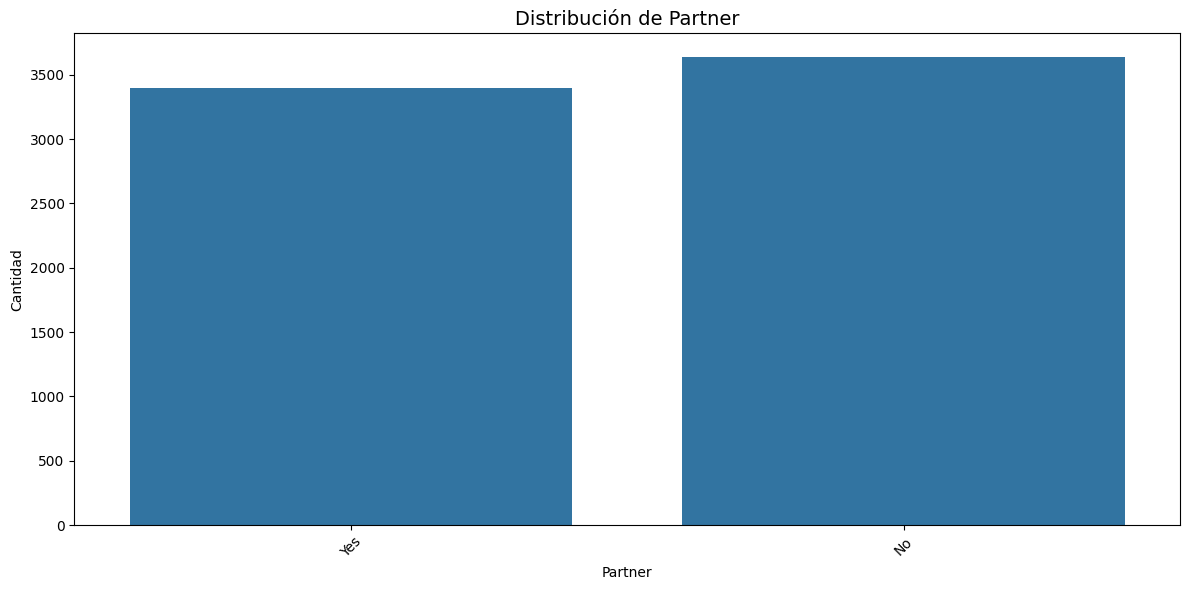


📊 Distribución porcentual de 'Partner':
Partner
No     51.75 %
Yes    48.25 %
Name: proportion, dtype: object
--------------------------------------------------


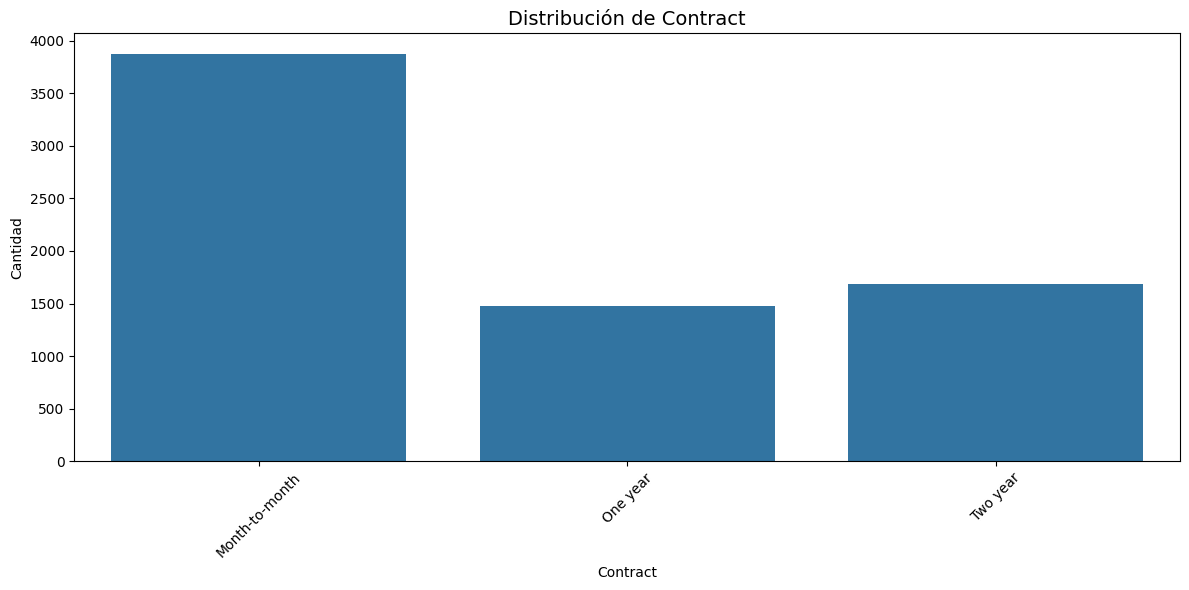


📊 Distribución porcentual de 'Contract':
Contract
Month-to-month    55.11 %
Two year          23.96 %
One year          20.93 %
Name: proportion, dtype: object
--------------------------------------------------


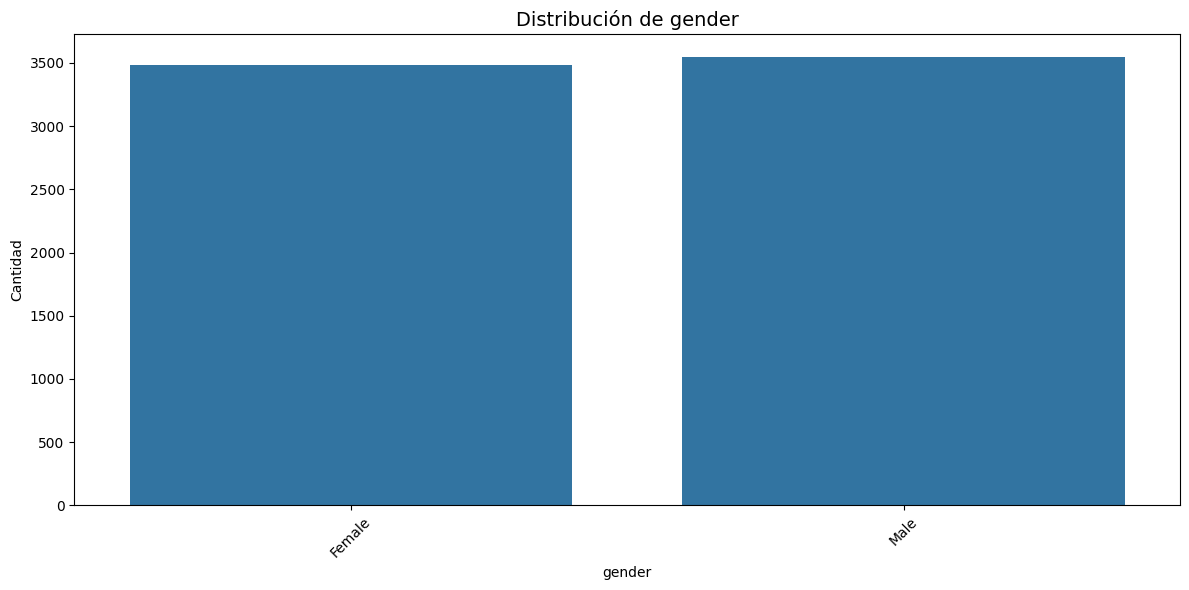


📊 Distribución porcentual de 'gender':
gender
Male      50.47 %
Female    49.53 %
Name: proportion, dtype: object
--------------------------------------------------


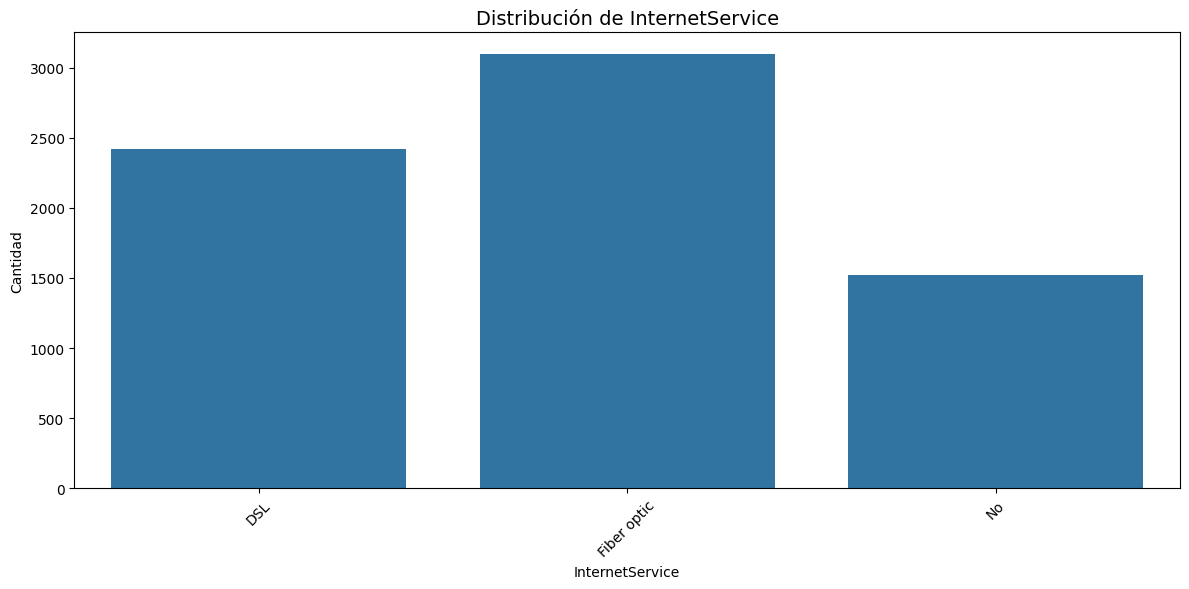


📊 Distribución porcentual de 'InternetService':
InternetService
Fiber optic    44.03 %
DSL            34.36 %
No             21.62 %
Name: proportion, dtype: object
--------------------------------------------------


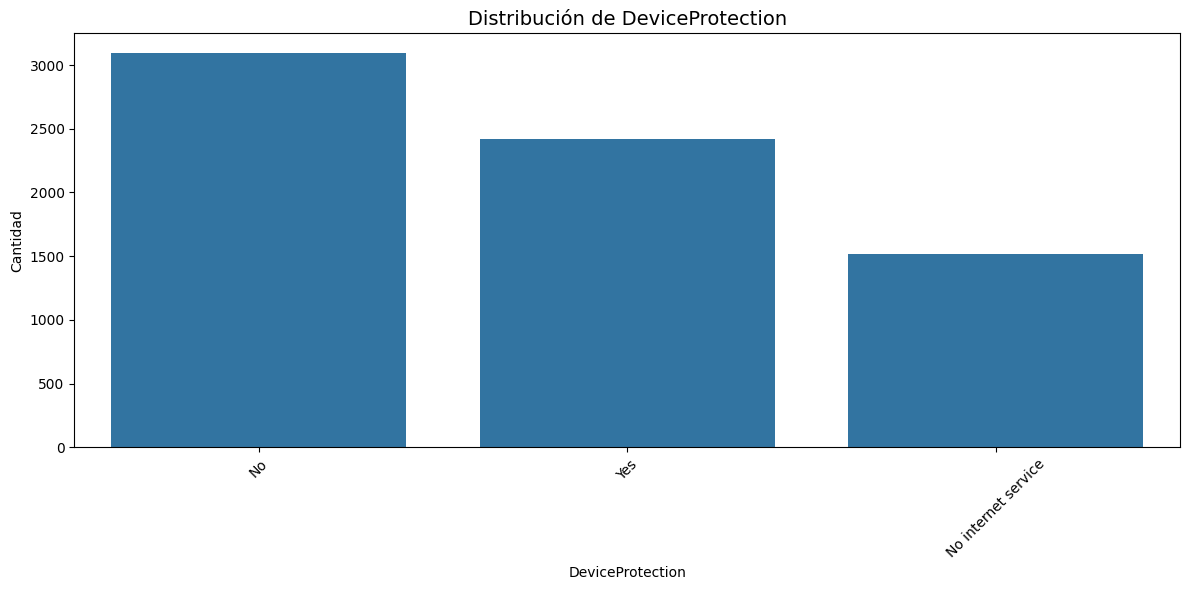


📊 Distribución porcentual de 'DeviceProtection':
DeviceProtection
No                      44.0 %
Yes                    34.39 %
No internet service    21.62 %
Name: proportion, dtype: object
--------------------------------------------------


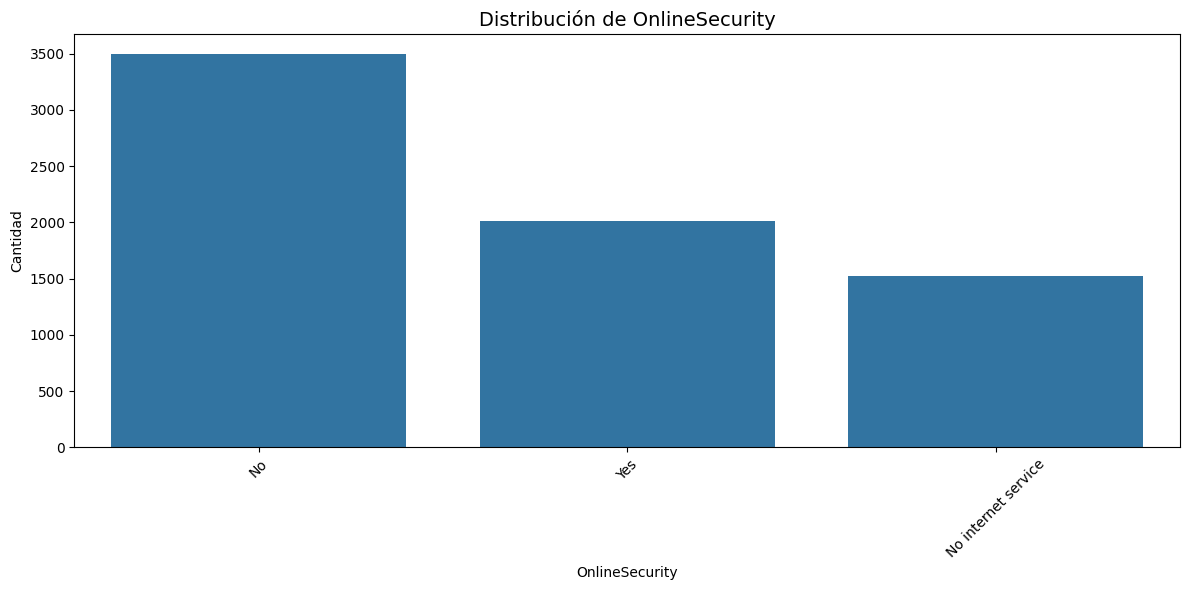


📊 Distribución porcentual de 'OnlineSecurity':
OnlineSecurity
No                     49.73 %
Yes                    28.65 %
No internet service    21.62 %
Name: proportion, dtype: object
--------------------------------------------------


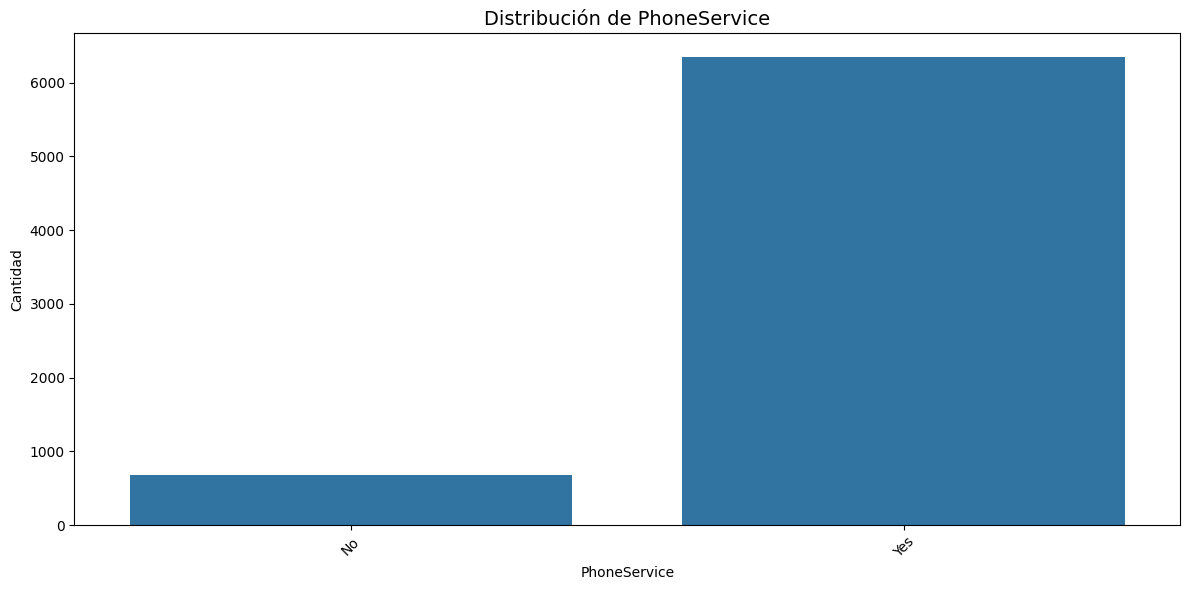


📊 Distribución porcentual de 'PhoneService':
PhoneService
Yes    90.33 %
No      9.67 %
Name: proportion, dtype: object
--------------------------------------------------


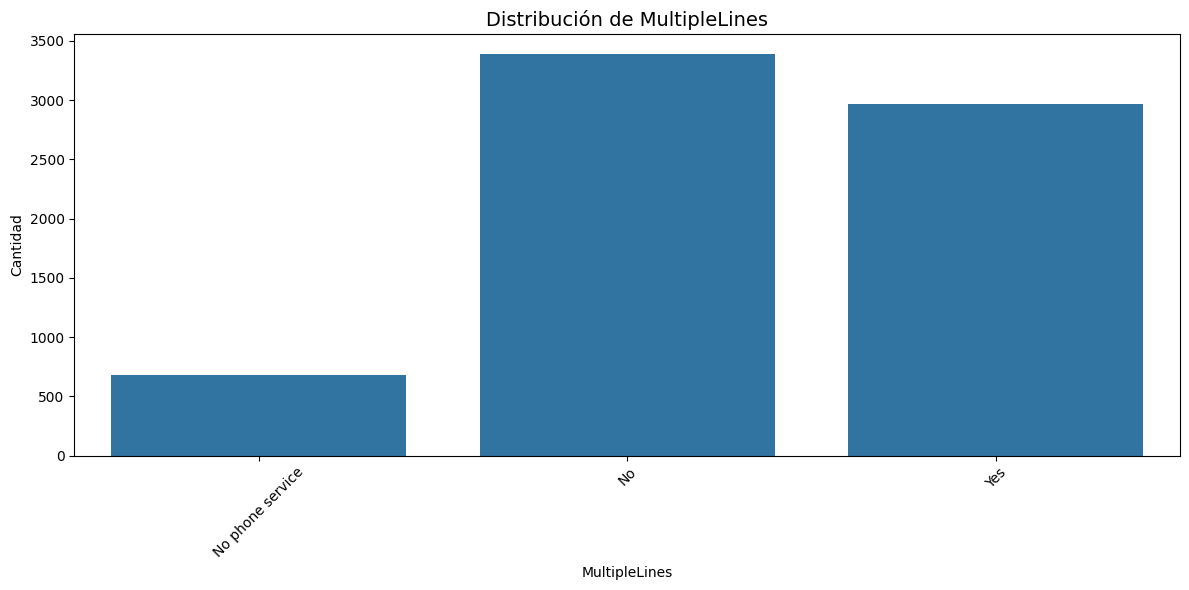


📊 Distribución porcentual de 'MultipleLines':
MultipleLines
No                  48.14 %
Yes                 42.19 %
No phone service     9.67 %
Name: proportion, dtype: object
--------------------------------------------------


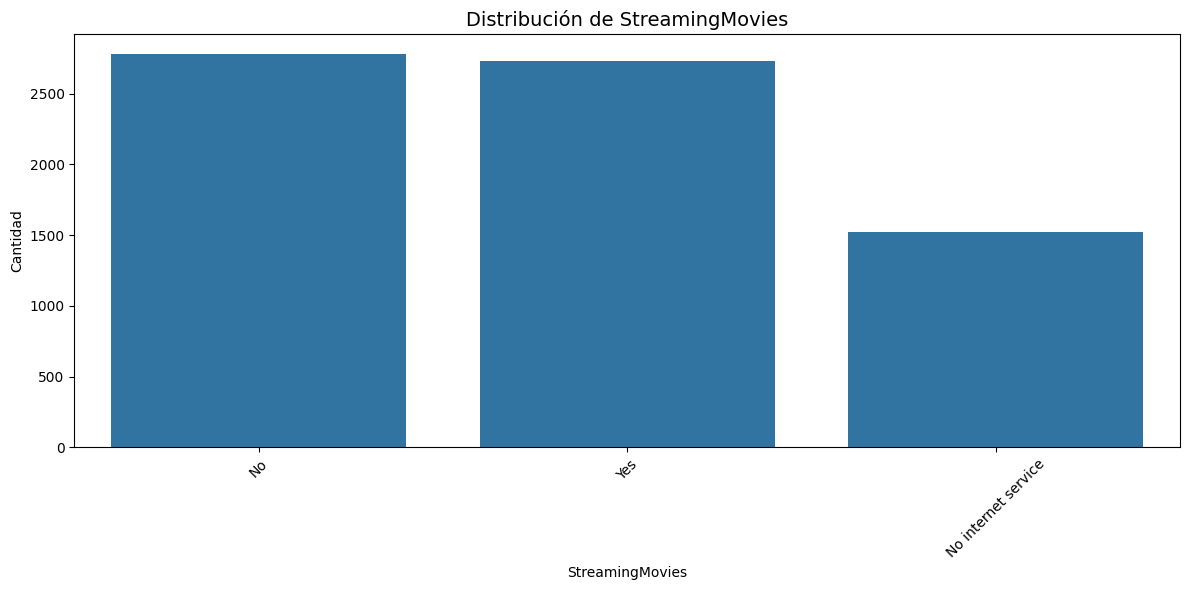


📊 Distribución porcentual de 'StreamingMovies':
StreamingMovies
No                     39.55 %
Yes                    38.84 %
No internet service    21.62 %
Name: proportion, dtype: object
--------------------------------------------------


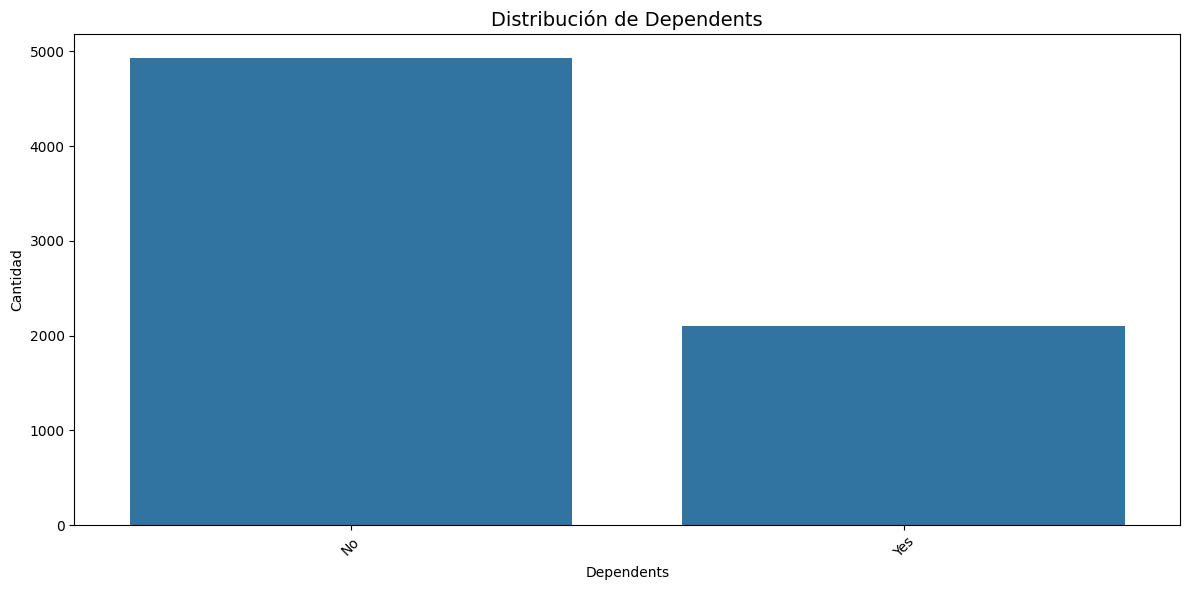


📊 Distribución porcentual de 'Dependents':
Dependents
No     70.15 %
Yes    29.85 %
Name: proportion, dtype: object
--------------------------------------------------


In [13]:
print("\n🔍 Análisis de variables categóricas:\n")

for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    
    sns.countplot(x=col, data=data)

    plt.title(f'Distribución de {col}', fontsize=14)
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Cantidad')
    plt.tight_layout()

    # Guardado automático de la gráfica
    filename = f'Distribucion_{col}.png'
    filepath = os.path.join(output_folder, filename)
    plt.savefig(filepath, dpi=300)

    plt.show()

    print(f"\n📊 Distribución porcentual de '{col}':")
    dist = data[col].value_counts(normalize=True) * 100
    print(dist.round(2).astype(str) + ' %')
    print("-" * 50)


## 📊 Análisis de variables numéricas

En esta celda se lleva a cabo un análisis visual y estadístico de las variables numéricas:

1. **Histograma con KDE**: Se crea un histograma acompañado de una curva de densidad (KDE) para visualizar la distribución de la variable.
2. **Boxplot**: Se genera un boxplot para observar la dispersión de los datos, identificar posibles outliers y entender la mediana y los cuartiles de la distribución.

Además, se imprimen las estadísticas descriptivas de cada variable numérica, lo que proporciona un resumen de su comportamiento, incluyendo medidas como la media, el percentil 25, el percentil 75, y los valores máximos y mínimos.

Este análisis es útil para detectar distribuciones sesgadas, valores atípicos y la variabilidad de las variables numéricas.



📊 Análisis de variables numéricas:


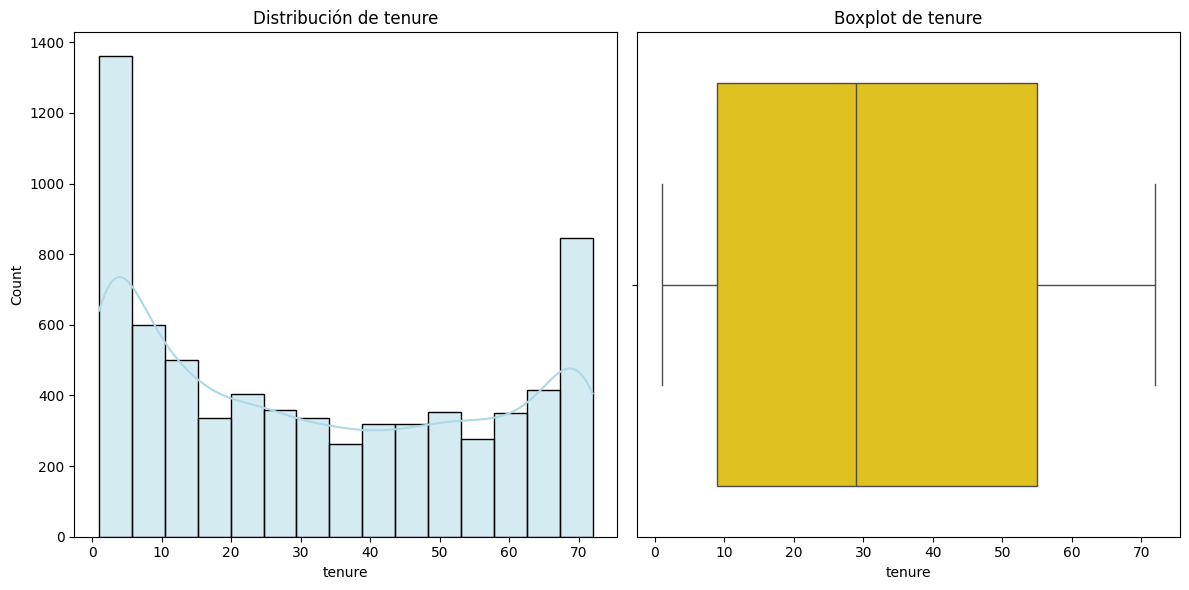


📈 Estadísticas de tenure:
count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


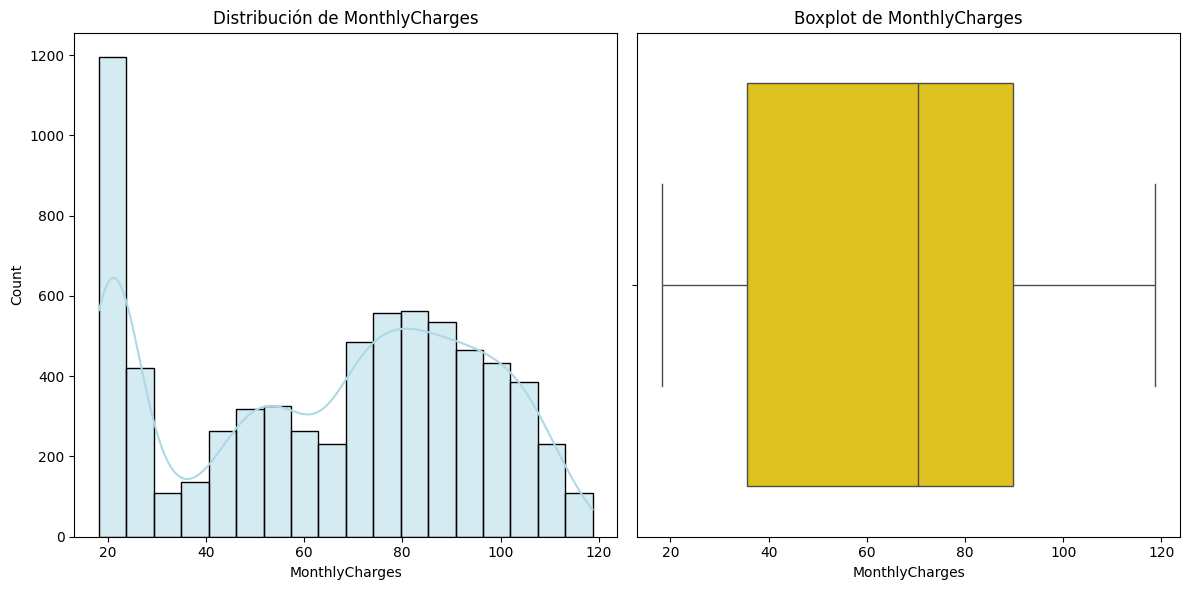


📈 Estadísticas de MonthlyCharges:
count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64


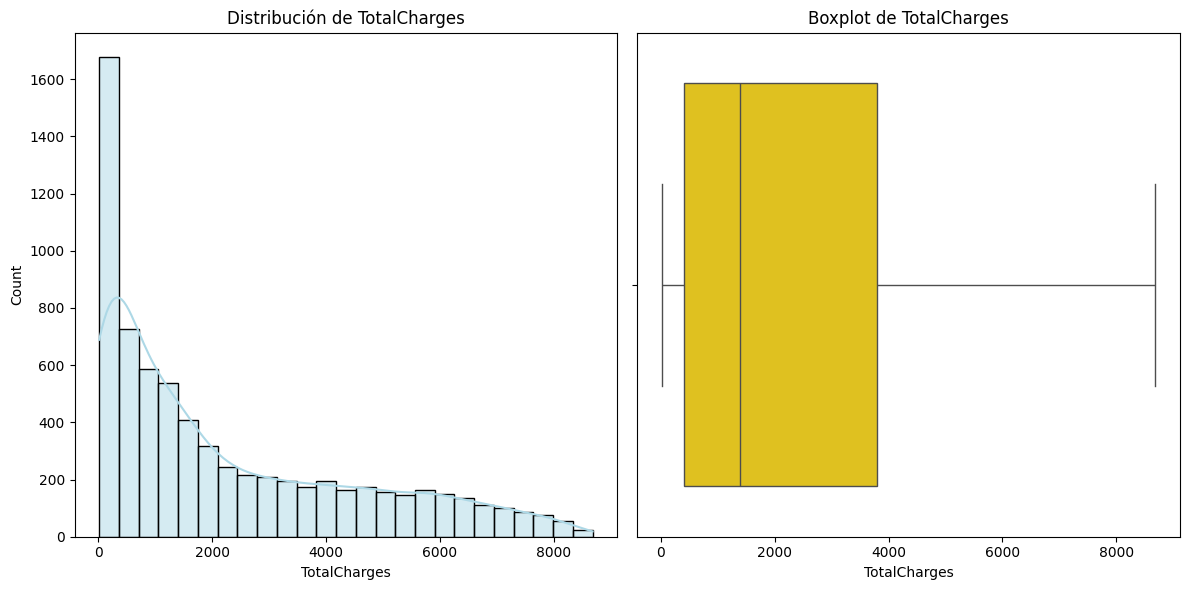


📈 Estadísticas de TotalCharges:
count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64


In [14]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

print("\n📊 Análisis de variables numéricas:")

for col in numeric_cols:
    plt.figure(figsize=(12, 6))

    # Histograma con KDE
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True, color="lightblue")
    plt.title(f'Distribución de {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col], color="gold")
    plt.title(f'Boxplot de {col}')

    plt.tight_layout()

    # Guardado automático de la gráfica
    filename = f'Distribucion_y_Boxplot_{col}.png'
    filepath = os.path.join(output_folder, filename)
    plt.savefig(filepath, dpi=300)

    plt.show()

    # Estadísticas
    print(f"\n📈 Estadísticas de {col}:")
    print(data[col].describe())


## 🔢 Codificación de la variable objetivo

En esta celda, se realiza la codificación de la variable objetivo (`{target_variable}`). Los valores categóricos de "Yes" y "No" son transformados en valores numéricos:

- "Yes" → 1
- "No" → 0

Este paso es necesario para poder utilizar la variable objetivo en los modelos de machine learning, ya que estos modelos requieren que las variables sean numéricas.

In [15]:
# Codificar la variable objetivo target_variable: "Yes" -> 1, "No" -> 0
data[target_variable] = data[target_variable].map({"Yes": 1, "No": 0})


## Análisis Bivariado/Multivariado

En esta sección, se analiza la relación entre las variables categóricas y la variable objetivo (`{target_variable}`). 

Para cada variable categórica, se crea un gráfico de barras que muestra la tasa de la variable objetivo para cada categoría. Esto nos ayuda a entender cómo las diferentes categorías afectan la probabilidad de que ocurra el evento representado por la variable objetivo.

Adicionalmente, se imprime la tasa de la variable objetivo para cada categoría de cada variable categórica, expresada como un porcentaje.


ANÁLISIS BIVARIADO/MULTIVARIADO


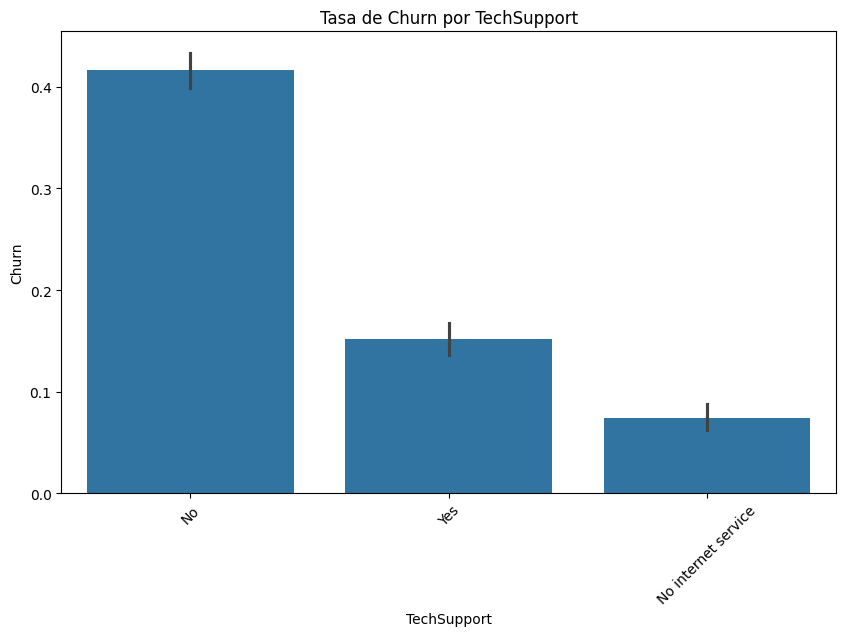


Tasa de Churn por TechSupport:
TechSupport
No                     41.65
No internet service     7.43
Yes                    15.20
Name: Churn, dtype: float64


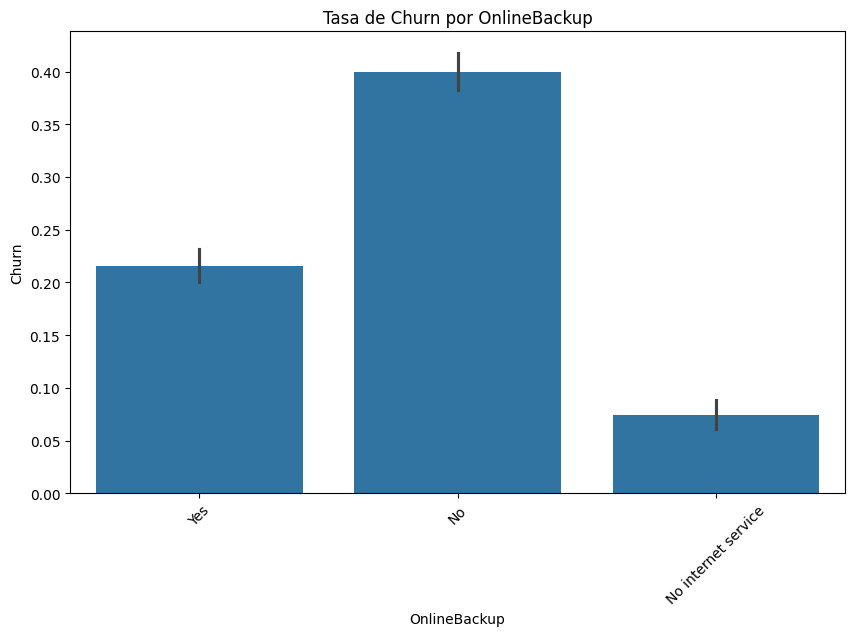


Tasa de Churn por OnlineBackup:
OnlineBackup
No                     39.94
No internet service     7.43
Yes                    21.57
Name: Churn, dtype: float64


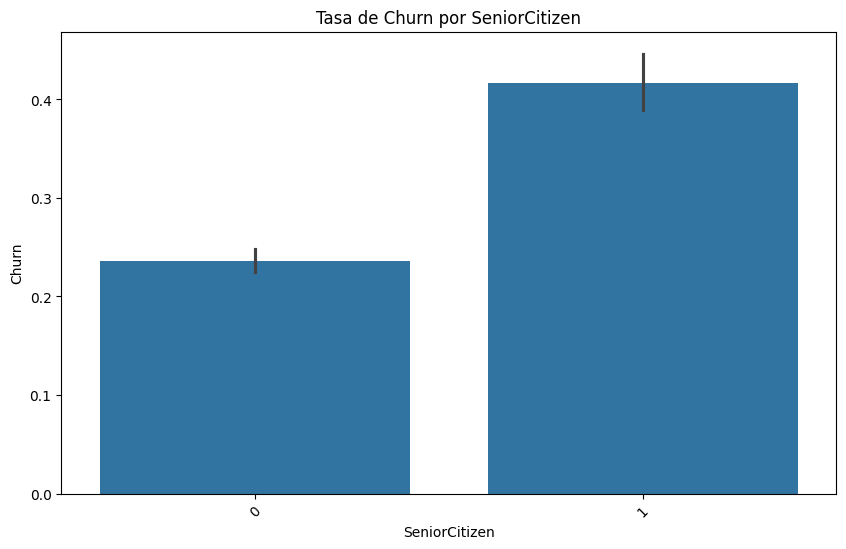


Tasa de Churn por SeniorCitizen:
SeniorCitizen
0    23.65
1    41.68
Name: Churn, dtype: float64


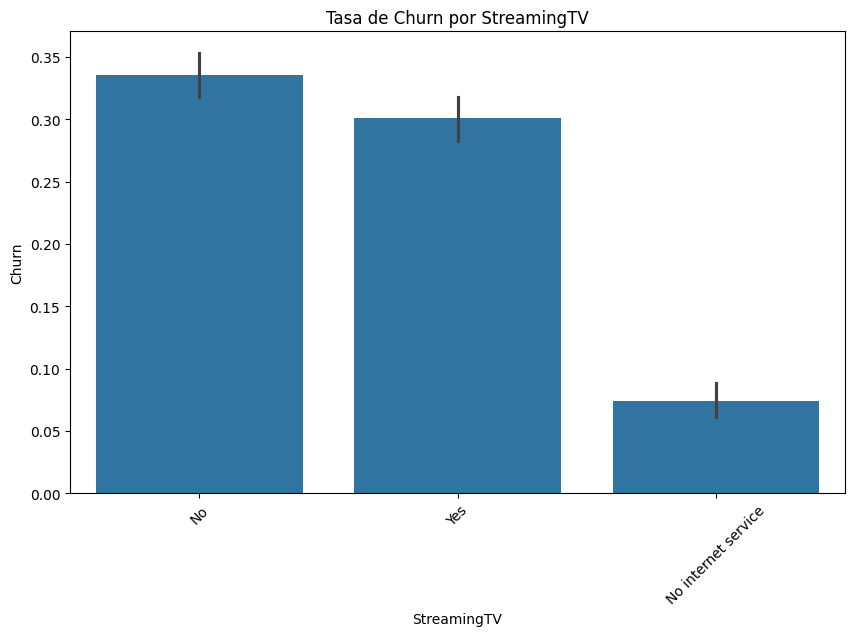


Tasa de Churn por StreamingTV:


StreamingTV
No                     33.54
No internet service     7.43
Yes                    30.11
Name: Churn, dtype: float64


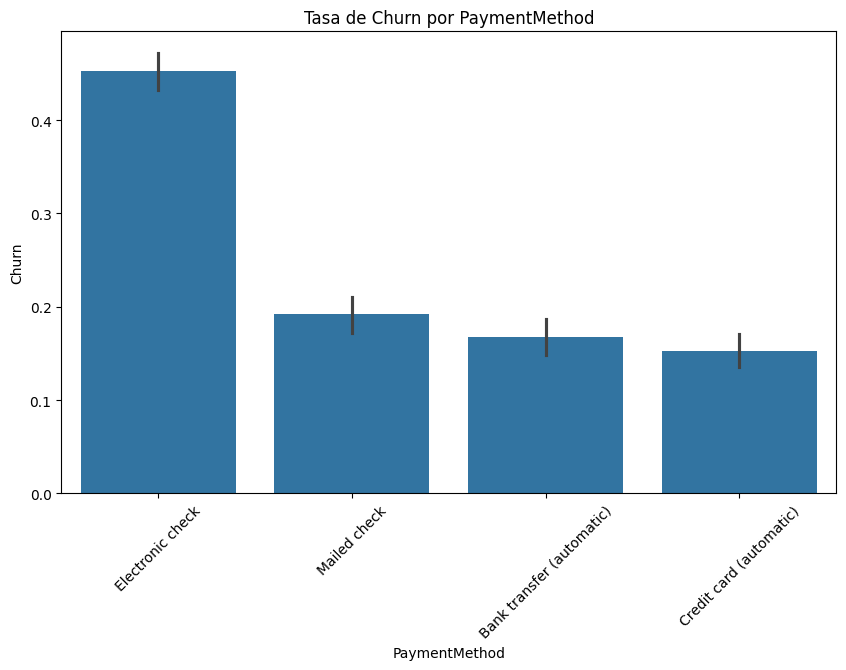


Tasa de Churn por PaymentMethod:
PaymentMethod
Bank transfer (automatic)    16.73
Credit card (automatic)      15.25
Electronic check             45.29
Mailed check                 19.20
Name: Churn, dtype: float64


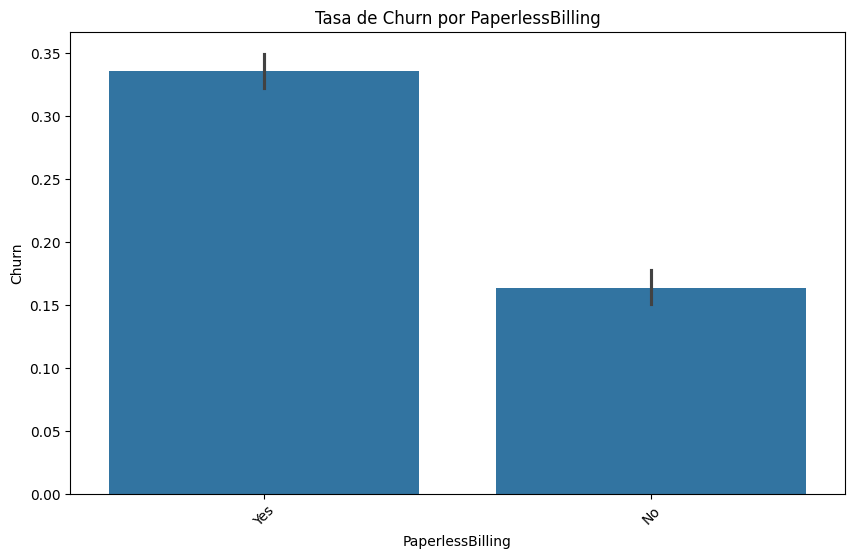


Tasa de Churn por PaperlessBilling:
PaperlessBilling
No     16.38
Yes    33.59
Name: Churn, dtype: float64


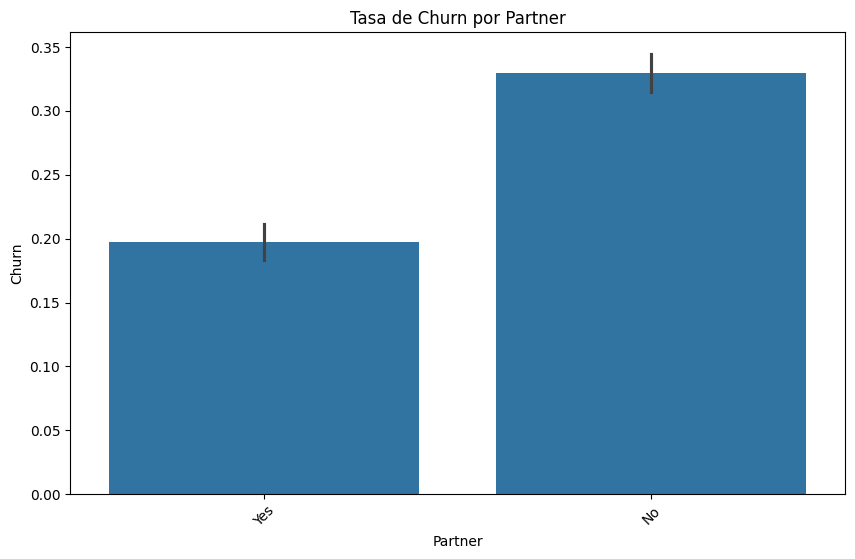


Tasa de Churn por Partner:
Partner
No     32.98
Yes    19.72
Name: Churn, dtype: float64


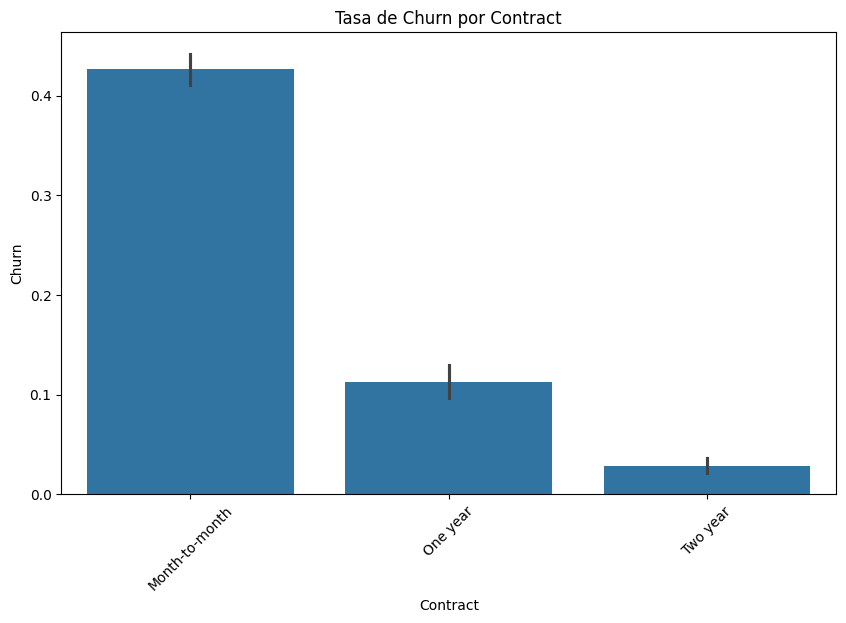


Tasa de Churn por Contract:
Contract
Month-to-month    42.71
One year          11.28
Two year           2.85
Name: Churn, dtype: float64


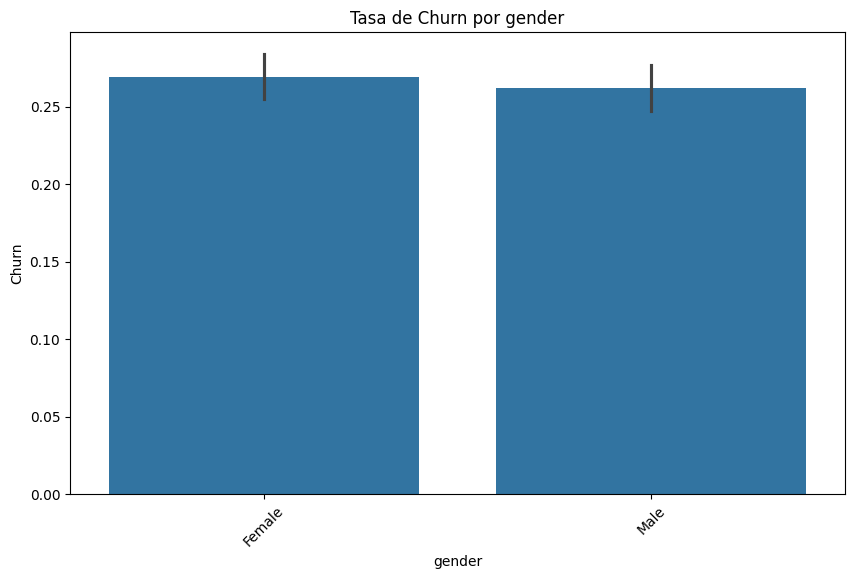


Tasa de Churn por gender:
gender
Female    26.96
Male      26.20
Name: Churn, dtype: float64


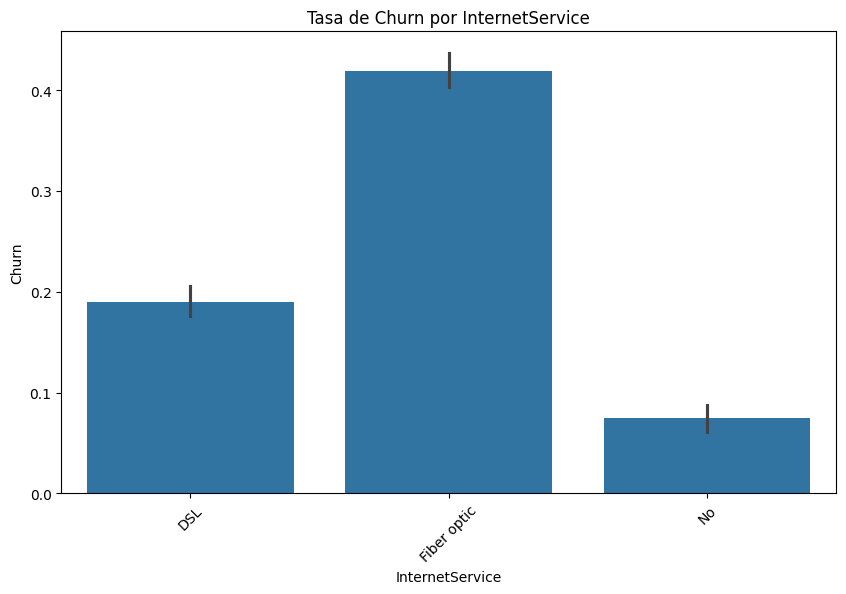


Tasa de Churn por InternetService:
InternetService
DSL            19.00
Fiber optic    41.89
No              7.43
Name: Churn, dtype: float64


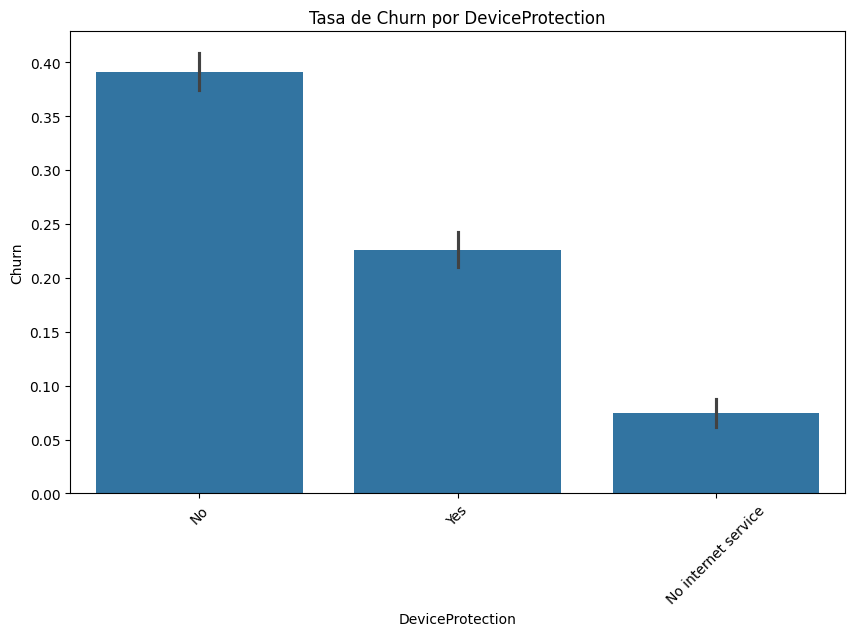


Tasa de Churn por DeviceProtection:
DeviceProtection
No                     39.14
No internet service     7.43
Yes                    22.54
Name: Churn, dtype: float64


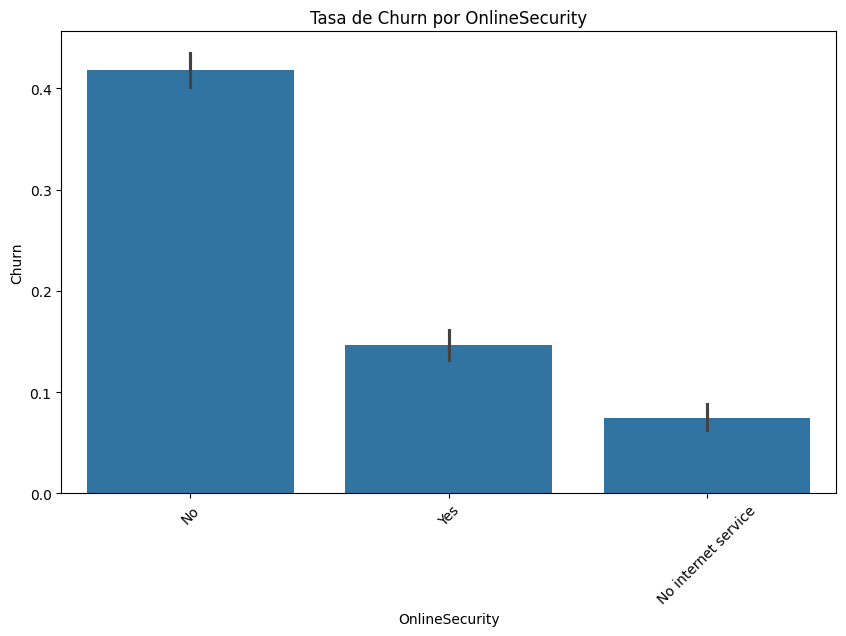


Tasa de Churn por OnlineSecurity:
OnlineSecurity
No                     41.78
No internet service     7.43
Yes                    14.64
Name: Churn, dtype: float64


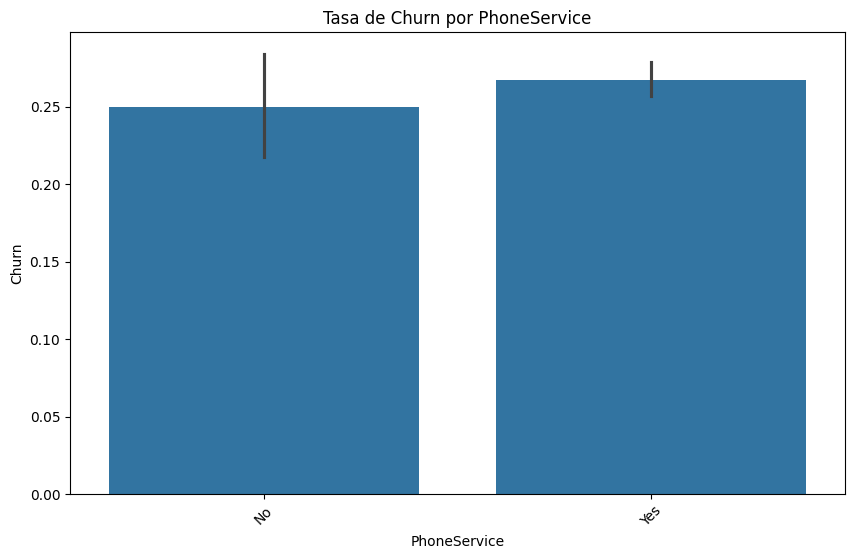


Tasa de Churn por PhoneService:
PhoneService
No     25.00
Yes    26.75
Name: Churn, dtype: float64


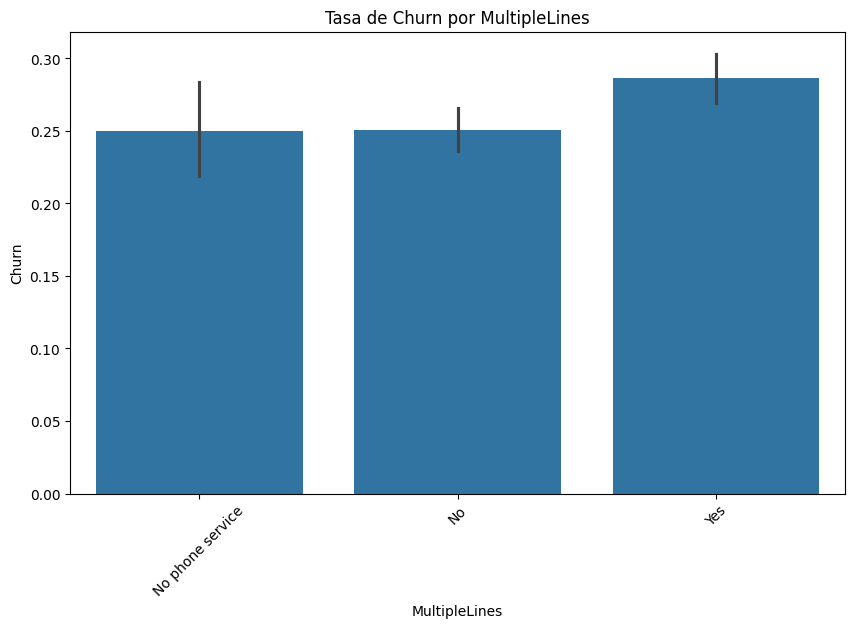


Tasa de Churn por MultipleLines:
MultipleLines
No                  25.08
No phone service    25.00
Yes                 28.65
Name: Churn, dtype: float64


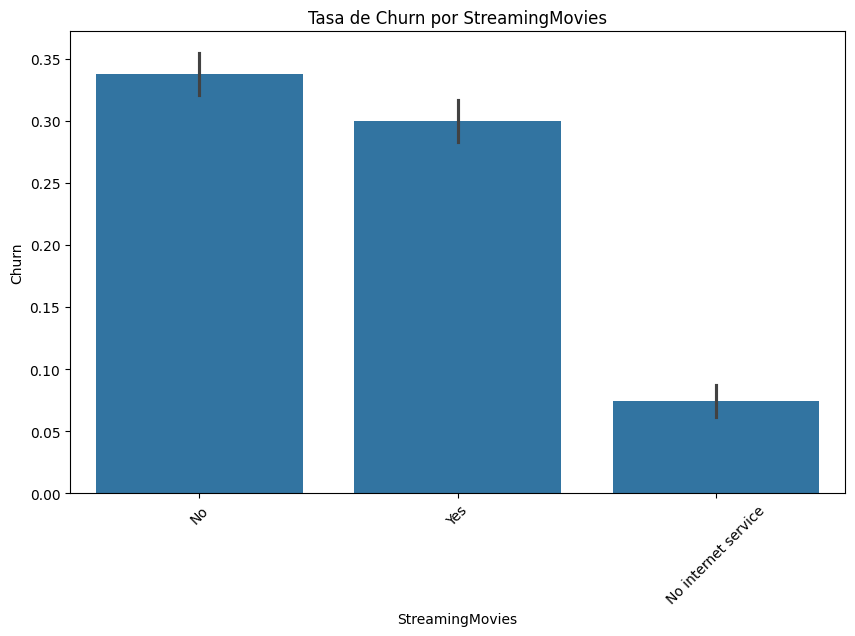


Tasa de Churn por StreamingMovies:
StreamingMovies
No                     33.73
No internet service     7.43
Yes                    29.95
Name: Churn, dtype: float64


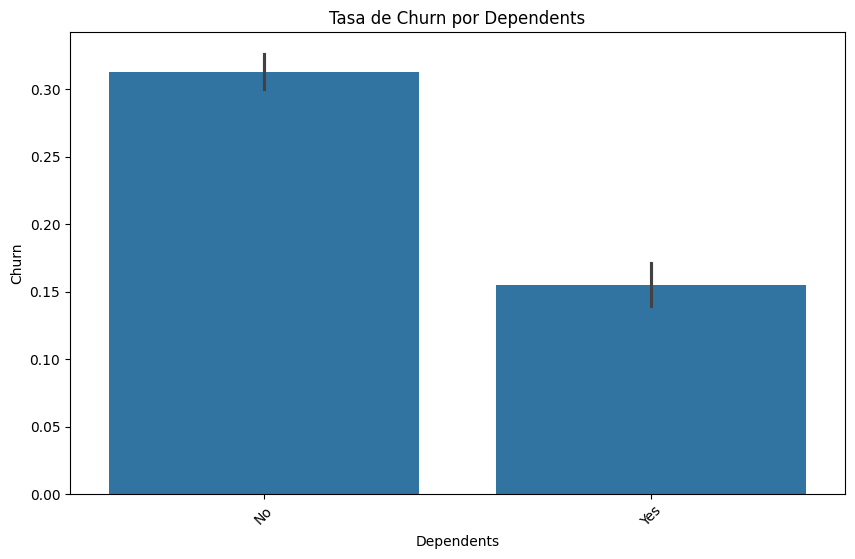


Tasa de Churn por Dependents:
Dependents
No     31.28
Yes    15.53
Name: Churn, dtype: float64


In [16]:

print("ANÁLISIS BIVARIADO/MULTIVARIADO")

# Relación entre variables categóricas y la variable objetivo
# Relación entre variables categóricas y la variable objetivo
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=col, y=target_variable, data=data)
    plt.title(f'Tasa de {target_variable} por {col}')
    plt.xticks(rotation=45)
    plt.show()

    print(f"\nTasa de {target_variable} por {col}:")
    print((data.groupby(col)[target_variable].mean() * 100).round(2))


## Relación entre Variables Numéricas y la Variable Objetivo

En esta sección, se explora la relación entre cada variable numérica y la variable objetivo (`{target_variable}`). 

Para cada variable numérica, se genera un gráfico de **boxplot** que muestra la distribución de la variable en función de la variable objetivo. Los boxplots nos permiten observar la dispersión y los valores atípicos (outliers) de cada variable numérica según las dos clases de la variable objetivo.

Además, se presentan las estadísticas descriptivas de cada variable numérica agrupada por la variable objetivo, lo que nos ayuda a entender cómo se comportan las variables numéricas en cada clase de la variable objetivo.


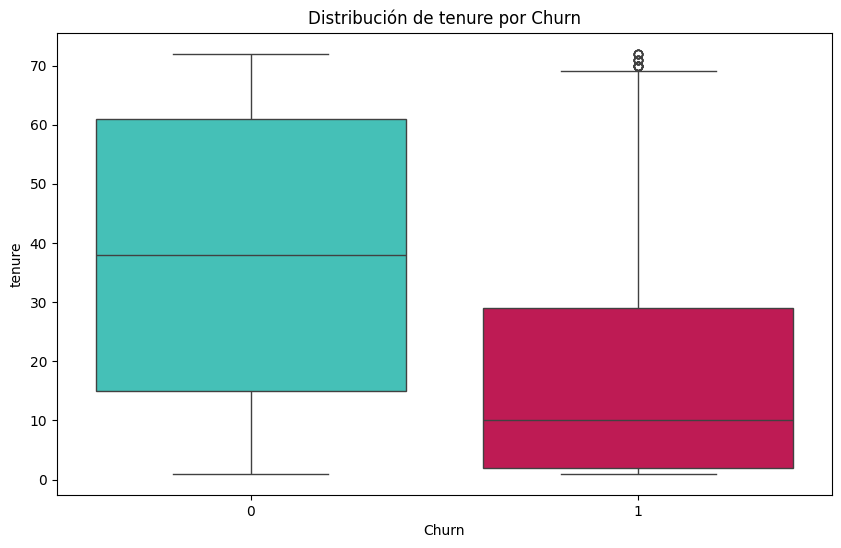


Estadísticas de tenure por Churn:
        count       mean        std  min   25%   50%   75%   max
Churn                                                           
0      5163.0  37.650010  24.076940  1.0  15.0  38.0  61.0  72.0
1      1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0


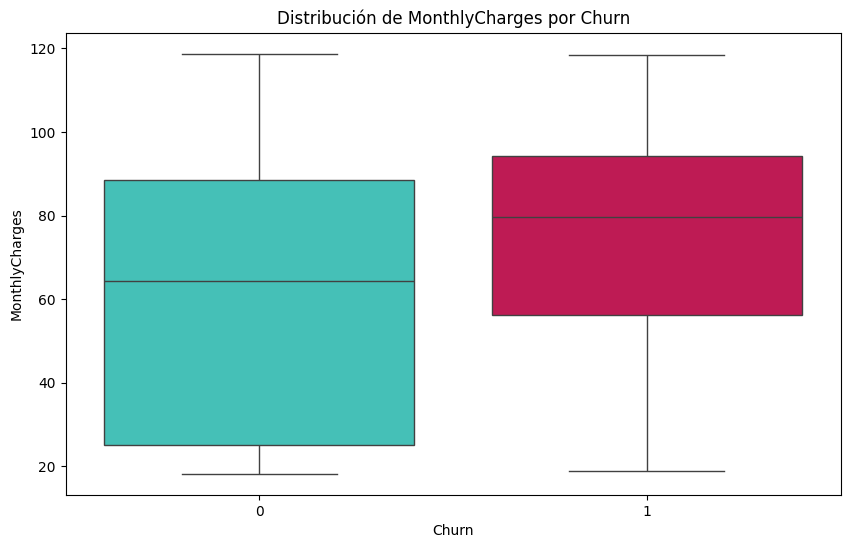


Estadísticas de MonthlyCharges por Churn:
        count       mean        std    min    25%    50%     75%     max
Churn                                                                   
0      5163.0  61.307408  31.094557  18.25  25.10  64.45  88.475  118.75
1      1869.0  74.441332  24.666053  18.85  56.15  79.65  94.200  118.35


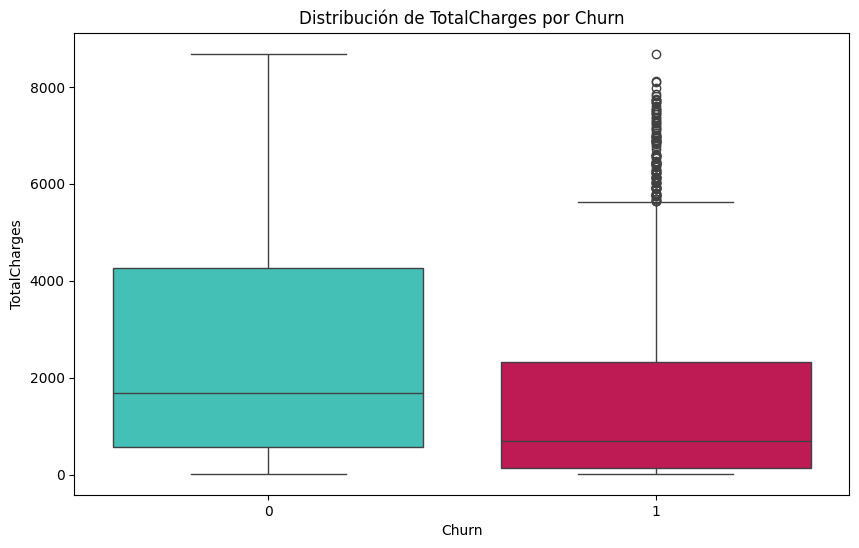


Estadísticas de TotalCharges por Churn:
        count         mean          std    min      25%      50%       75%  \
Churn                                                                        
0      5163.0  2555.344141  2329.456984  18.80  577.825  1683.60  4264.125   
1      1869.0  1531.796094  1890.822994  18.85  134.500   703.55  2331.300   

           max  
Churn           
0      8672.45  
1      8684.80  


In [17]:
# Relación entre variables numéricas y la variable objetivo
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=target_variable, y=col, data=data, hue=target_variable, palette=["#30D5C8", "#D9004C"], dodge=False)
    plt.title(f'Distribución de {col} por {target_variable}')
    plt.legend([],[], frameon=False)  # Oculta leyenda duplicada
    plt.show()

    print(f"\nEstadísticas de {col} por {target_variable}:")
    print(data.groupby(target_variable)[col].describe())


## Matriz de Correlación

En esta sección, se calcula y visualiza la matriz de correlación entre las variables numéricas del dataset. La matriz de correlación nos muestra cómo se relacionan entre sí las variables numéricas, indicando la fuerza y la dirección de la relación (positiva o negativa) mediante el coeficiente de correlación de Pearson.

Se utiliza un **heatmap** para visualizar las correlaciones de manera intuitiva. Los valores cercanos a +1 indican una fuerte correlación positiva, mientras que los valores cercanos a -1 indican una fuerte correlación negativa. Los valores cercanos a 0 sugieren una baja o nula correlación.


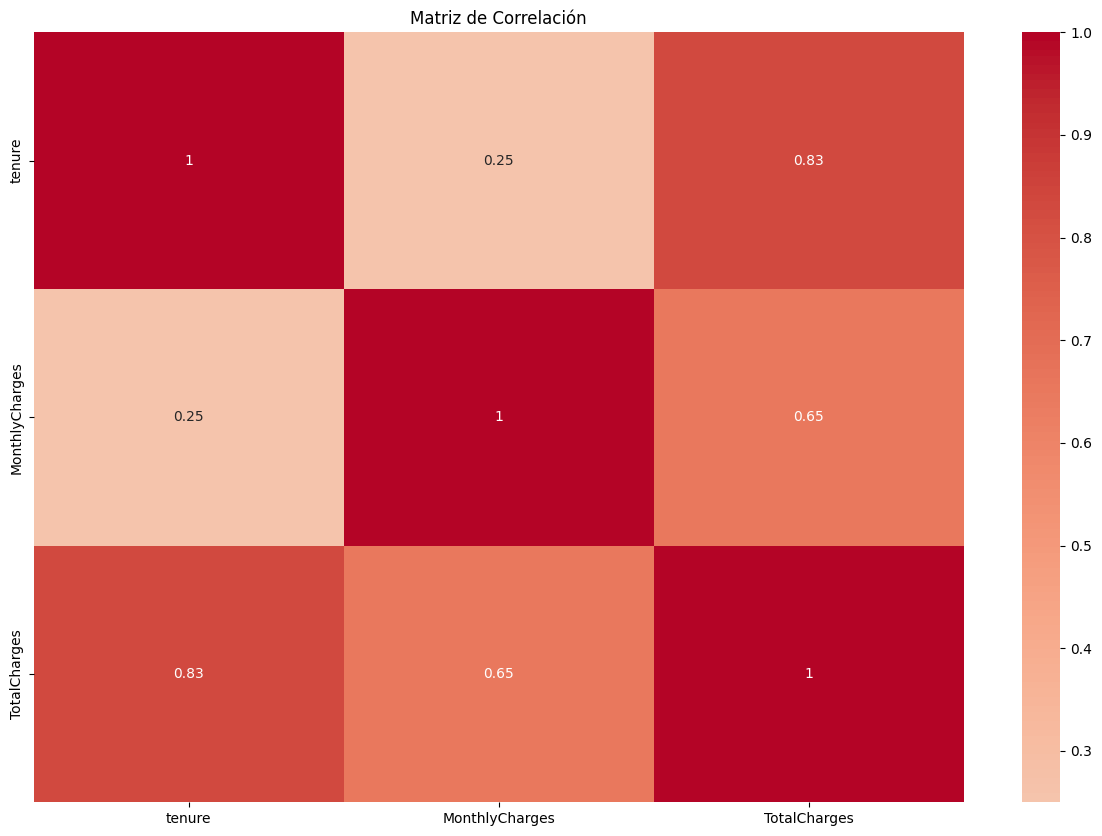

In [18]:
# Matriz de correlación
corr_matrix = data[numeric_cols].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix.round(2), annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')

# Guardado automático de la gráfica
corr_path = os.path.join(output_folder, 'Matriz_Correlacion.png')
plt.savefig(corr_path, dpi=300)

plt.show()


## Análisis de Variables Altamente Correlacionadas

En esta parte, se realiza un análisis de las variables numéricas que están fuertemente correlacionadas entre sí. Utilizando un umbral de correlación de 0.7, identificamos las parejas de variables cuya relación es tan fuerte que podría afectar a la calidad del modelo debido a la multicolinealidad. Estas variables podrían ser consideradas para eliminación o combinación en fases posteriores del análisis para mejorar la robustez del modelo.


In [19]:

# Análisis de variables altamente correlacionadas
high_corr = corr_matrix.abs().stack().reset_index()
high_corr = high_corr[high_corr['level_0'] != high_corr['level_1']]
high_corr = high_corr.sort_values(0, ascending=False)
high_corr = high_corr[high_corr[0] > 0.7]  # Umbral de correlación alta
print("\nVariables altamente correlacionadas:")
print(high_corr)


Variables altamente correlacionadas:
        level_0       level_1        0
2        tenure  TotalCharges  0.82588
6  TotalCharges        tenure  0.82588


## Codificación de Variables Categóricas

En esta sección, se codifican las variables categóricas del dataset. Las variables binarias (aquellas con solo dos categorías) son codificadas utilizando el **LabelEncoder**. Esto transforma las categorías en valores numéricos 0 y 1. Para las variables con más de dos categorías, se utiliza el **One-Hot Encoding**, que crea columnas adicionales para cada categoría, evitando así la multicolinealidad al eliminar la primera categoría de cada variable codificada.

El resultado final es un conjunto de datos numérico listo para ser utilizado en modelos predictivos.


In [20]:
# Inicializamos codificador para variables binarias
le = LabelEncoder()
# Creamos una copia del dataframe para codificación
data_encoded = data.copy()
# Codificamos variables binarias (2 categorías)
binary_cols = [col for col in categorical_cols if data[col].nunique() == 2]
print(" Codificando variables binarias con LabelEncoder:")
for col in binary_cols:
    data_encoded[col] = le.fit_transform(data_encoded[col])
    print(f" - {col}: {data[col].unique().tolist()} → {le.classes_.tolist()}")
# El resto se codifica con One-Hot Encoding
multiclass_cols = [col for col in categorical_cols if col not in binary_cols]
# One-hot encoding → evita colinealidad dejando drop_first=True
data_encoded = pd.get_dummies(data_encoded, columns=multiclass_cols, drop_first=True)
# Resultado final
print(f"\n Dataset codificado con {data_encoded.shape[1]} columnas.")
print(" Variables binarias codificadas:", binary_cols)
print(" Variables multiclase codificadas con one-hot:", multiclass_cols)

 Codificando variables binarias con LabelEncoder:
 - SeniorCitizen: [0, 1] → [0, 1]
 - PaperlessBilling: ['Yes', 'No'] → ['No', 'Yes']
 - Partner: ['Yes', 'No'] → ['No', 'Yes']
 - gender: ['Female', 'Male'] → ['Female', 'Male']
 - PhoneService: ['No', 'Yes'] → ['No', 'Yes']
 - Dependents: ['No', 'Yes'] → ['No', 'Yes']

 Dataset codificado con 31 columnas.
 Variables binarias codificadas: ['SeniorCitizen', 'PaperlessBilling', 'Partner', 'gender', 'PhoneService', 'Dependents']
 Variables multiclase codificadas con one-hot: ['TechSupport', 'OnlineBackup', 'StreamingTV', 'PaymentMethod', 'Contract', 'InternetService', 'DeviceProtection', 'OnlineSecurity', 'MultipleLines', 'StreamingMovies']


## División del Dataset en Entrenamiento, Validación y Test

En esta etapa, el conjunto de datos se divide en tres subconjuntos:

1. **Entrenamiento (70%)**: Para entrenar los modelos.
2. **Validación (15%)**: Para evaluar y ajustar los modelos durante el proceso de entrenamiento.
3. **Test (15%)**: Para realizar una evaluación final del modelo y simular su rendimiento en datos nuevos.

Además, se asegura que la variable objetivo (target) esté balanceada en todos los subconjuntos mediante la opción `stratify`, lo que mantiene la misma distribución de clases en cada división.


In [21]:
#  Variable objetivo
y = data_encoded[target_variable]
#  Variables predictoras (todas las demás)
X = data_encoded.drop(columns=target_variable)
#  División inicial: entrenamiento + resto (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
#  División del 30% restante en validación y test (50/50 del 30% → 15% y 15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)
#  Verificación de tamaños
print(" Tamaños de los subconjuntos:")
print(f"- X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"- X_val:   {X_val.shape}, y_val:   {y_val.shape}")
print(f"- X_test:  {X_test.shape}, y_test:  {y_test.shape}")
#  Verificación de balance
print("\n Distribución de clases en los subconjuntos:")
print("Entrenamiento:\n", y_train.value_counts(normalize=True).round(2))
print("Validación:\n", y_val.value_counts(normalize=True).round(2))
print("Test:\n", y_test.value_counts(normalize=True).round(2))

 Tamaños de los subconjuntos:
- X_train: (4922, 30), y_train: (4922,)
- X_val:   (1055, 30), y_val:   (1055,)
- X_test:  (1055, 30), y_test:  (1055,)

 Distribución de clases en los subconjuntos:
Entrenamiento:
 Churn
0    0.73
1    0.27
Name: proportion, dtype: float64
Validación:
 Churn
0    0.73
1    0.27
Name: proportion, dtype: float64
Test:
 Churn
0    0.73
1    0.27
Name: proportion, dtype: float64


## Entrenamiento del Modelo de Regresión Logística y Evaluación

En esta etapa, se entrena un modelo de **Regresión Logística** utilizando el conjunto de entrenamiento y se evalúa su rendimiento en el conjunto de validación.

1. **Métricas de rendimiento**: Se calcula el reporte de clasificación con métricas como precisión, recall, f1-score y soporte.
2. **Matriz de confusión**: Se muestra la matriz de confusión para visualizar el desempeño del modelo.
3. **AUC-ROC**: Se calcula el puntaje AUC-ROC para evaluar la capacidad del modelo para distinguir entre las clases.
4. **Curva ROC**: Se genera y guarda la curva ROC para visualizar el trade-off entre los verdaderos positivos y los falsos positivos.

Todo el análisis visual se guarda en la carpeta especificada para su posterior revisión.


 Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       774
           1       0.70      0.60      0.65       281

    accuracy                           0.82      1055
   macro avg       0.78      0.75      0.77      1055
weighted avg       0.82      0.82      0.82      1055

 Matriz de confusión:
[[700  74]
 [111 170]]
 AUC-ROC: 0.8532


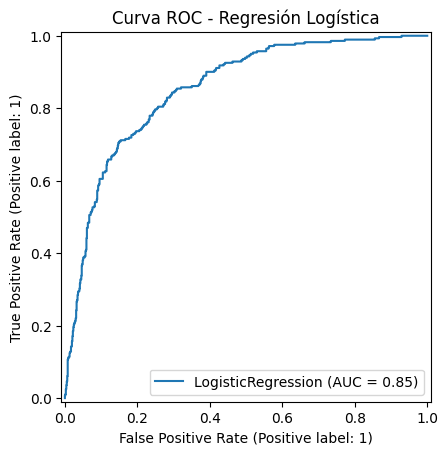

In [22]:
# Asignamos carpeta para guardar gráficos
output_folder = "../Visuals/preprocesamiento_y_modelado"

# Instanciamos y entrenamos el modelo
log_model = LogisticRegression(max_iter=3000, random_state=42)
log_model.fit(X_train, y_train)
# Predicción en el conjunto de validación
y_pred = log_model.predict(X_val)
y_prob = log_model.predict_proba(X_val)[:, 1]  # Probabilidad para curva ROC
# Reporte de métricas
print(" Reporte de clasificación:")
print(classification_report(y_val, y_pred))
#  Matriz de confusión
print(" Matriz de confusión:")
print(confusion_matrix(y_val, y_pred))
#  AUC-ROC
auc_score = roc_auc_score(y_val, y_prob)
print(f" AUC-ROC: {auc_score:.4f}")
#  Curva ROC
RocCurveDisplay.from_estimator(log_model, X_val, y_val)
plt.title("Curva ROC - Regresión Logística")
plt.savefig(os.path.join(output_folder, 'Curva_ROC_Regresión_Logística'), dpi=300)
plt.show()

## Escalado de Variables Numéricas

En esta sección, se aplica el **escalado estándar** (StandardScaler) a las variables numéricas del conjunto de entrenamiento, validación y test.

1. **Escalado**: Se estandarizan las variables numéricas para que tengan media 0 y desviación estándar 1, utilizando solo los datos de entrenamiento para ajustar el escalador.
2. **Aplicación**: Se aplican las transformaciones correspondientes a los conjuntos de validación y test, manteniendo la consistencia.
3. **Verificación**: Se imprimen las estadísticas de las variables escaladas para asegurar que el proceso se realizó correctamente.

Esto es importante para asegurar que el modelo no se vea influenciado por las escalas originales de las variables, lo cual es crucial para algunos algoritmos como la regresión logística o los árboles de decisión.


In [23]:
#  Creamos copias de los conjuntos para mantener los originales
X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
X_test_scaled = X_test.copy()
#  Columnas a escalar (ya las tenemos definidas como numeric_cols)
cols_to_scale = numeric_cols
#  Inicializamos el scaler y lo ajustamos solo con los datos de entrenamiento
scaler = StandardScaler()
X_train_scaled[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
#  Aplicamos el mismo escalado a validación y test
X_val_scaled[cols_to_scale] = scaler.transform(X_val[cols_to_scale])
X_test_scaled[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
#  Confirmamos estadísticas de escalado
print(" Promedio de variables escaladas (entrenamiento):")
print(X_train_scaled[cols_to_scale].mean().round(2))
print("\n Desviación estándar:")
print(X_train_scaled[cols_to_scale].std().round(2))


 Promedio de variables escaladas (entrenamiento):
tenure            0.0
MonthlyCharges    0.0
TotalCharges      0.0
dtype: float64

 Desviación estándar:
tenure            1.0
MonthlyCharges    1.0
TotalCharges      1.0
dtype: float64


## Entrenamiento y Evaluación del Modelo con Datos Escalados

En esta sección, se entrena un **modelo de regresión logística** utilizando las variables escaladas:

1. **Entrenamiento**: Se entrena el modelo con los datos de entrenamiento escalados (X_train_scaled).
2. **Predicción**: Se realiza la predicción en el conjunto de validación escalado (X_val_scaled).
3. **Evaluación**: Se calculan las métricas de evaluación, incluyendo el **AUC-ROC**.
4. **Curva ROC**: Se genera la curva ROC para evaluar el rendimiento del modelo en cuanto a la capacidad de clasificación.
   
Este proceso es esencial para comparar el impacto del escalado de las características en el rendimiento del modelo, ya que algunos algoritmos pueden beneficiarse significativamente de tener las variables en la misma escala.


 Reporte de clasificación (con escalado):
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       774
           1       0.69      0.60      0.65       281

    accuracy                           0.82      1055
   macro avg       0.78      0.75      0.76      1055
weighted avg       0.82      0.82      0.82      1055

 Matriz de confusión:
[[699  75]
 [111 170]]
 AUC-ROC: 0.8533


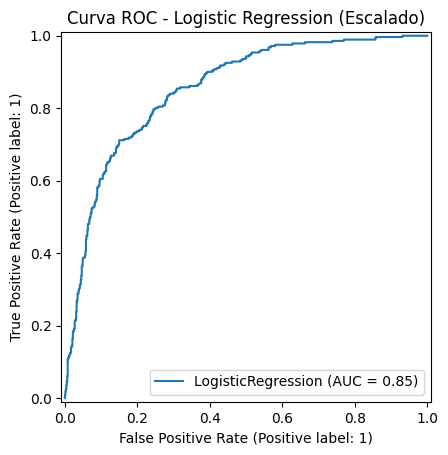

In [24]:
# Asignamos carpeta para guardar gráficos
output_folder = "../Visuals/preprocesamiento_y_modelado"
#  Modelo con datos escalados
log_model_scaled = LogisticRegression(max_iter=1000, random_state=42)
log_model_scaled.fit(X_train_scaled, y_train)
#  Predicciones
y_pred_scaled = log_model_scaled.predict(X_val_scaled)
y_prob_scaled = log_model_scaled.predict_proba(X_val_scaled)[:, 1]
#  Reporte actualizado
print(" Reporte de clasificación (con escalado):")
print(classification_report(y_val, y_pred_scaled))
print(" Matriz de confusión:")
print(confusion_matrix(y_val, y_pred_scaled))
print(f" AUC-ROC: {roc_auc_score(y_val, y_prob_scaled):.4f}")
# Curva ROC
RocCurveDisplay.from_estimator(log_model_scaled, X_val_scaled, y_val)
plt.title("Curva ROC - Logistic Regression (Escalado)")
plt.savefig(os.path.join(output_folder, 'Curva_ROC_Logistic_Regression_Escalado'), dpi=300)
plt.show()

## Entrenamiento y Evaluación del Modelo Árbol de Decisión

En esta parte, se entrena un **modelo de Árbol de Decisión** con los datos de entrenamiento y se evalúa su rendimiento utilizando los siguientes pasos:

1. **Entrenamiento**: El modelo de árbol de decisión se entrena con el conjunto de datos de entrenamiento (X_train).
2. **Predicción**: Se realiza la predicción sobre el conjunto de validación (X_val).
3. **Evaluación**: Se calculan las métricas de evaluación, como el **AUC-ROC**, y se muestra la matriz de confusión.
4. **Curva ROC**: Se genera la curva ROC para evaluar la capacidad de clasificación del modelo.

Este modelo es útil para visualizar las decisiones que toma el clasificador a través de su estructura jerárquica.


 Reporte de clasificación (Árbol de Decisión):
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       774
           1       0.49      0.52      0.50       281

    accuracy                           0.73      1055
   macro avg       0.65      0.66      0.66      1055
weighted avg       0.73      0.73      0.73      1055

 Matriz de confusión:
[[619 155]
 [135 146]]
 AUC-ROC: 0.6611


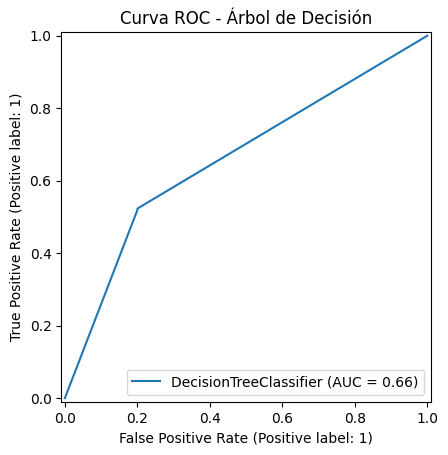

In [25]:
# Asignamos carpeta para guardar gráficos
output_folder = "../Visuals/preprocesamiento_y_modelado"

#  Instanciamos el modelo (sin profundidad limitada para primera prueba)
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
#  Predicciones
y_pred_tree = tree_model.predict(X_val)
y_prob_tree = tree_model.predict_proba(X_val)[:, 1]
#  Reporte
print(" Reporte de clasificación (Árbol de Decisión):")
print(classification_report(y_val, y_pred_tree))
print(" Matriz de confusión:")
print(confusion_matrix(y_val, y_pred_tree))
print(f" AUC-ROC: {roc_auc_score(y_val, y_prob_tree):.4f}")
#  Curva ROC
RocCurveDisplay.from_estimator(tree_model, X_val, y_val)
plt.title("Curva ROC - Árbol de Decisión")
plt.savefig(os.path.join(output_folder, 'Curva_ROC_Arbol_de_Decisión'), dpi=300)
plt.show()

## Entrenamiento y Evaluación del Modelo Random Forest

En este bloque, entrenamos un **modelo de Random Forest** para clasificación. Los pasos realizados son los siguientes:

1. **Entrenamiento**: El modelo de random forest se entrena con el conjunto de datos de entrenamiento (X_train) utilizando 100 árboles.
2. **Predicción**: Se realiza la predicción sobre el conjunto de validación (X_val).
3. **Evaluación**: Se calculan las métricas de evaluación, como el **AUC-ROC**, y se muestra la matriz de confusión.
4. **Curva ROC**: Se genera la curva ROC para visualizar el rendimiento del modelo en términos de tasa de verdaderos positivos frente a la tasa de falsos positivos.

Este modelo es adecuado para problemas con datos complejos, ya que combina múltiples árboles de decisión para mejorar la precisión y evitar sobreajuste.


 Reporte de clasificación (Random Forest):
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       774
           1       0.64      0.50      0.56       281

    accuracy                           0.79      1055
   macro avg       0.74      0.70      0.71      1055
weighted avg       0.78      0.79      0.78      1055

 Matriz de confusión:
[[696  78]
 [141 140]]
 AUC-ROC: 0.8306


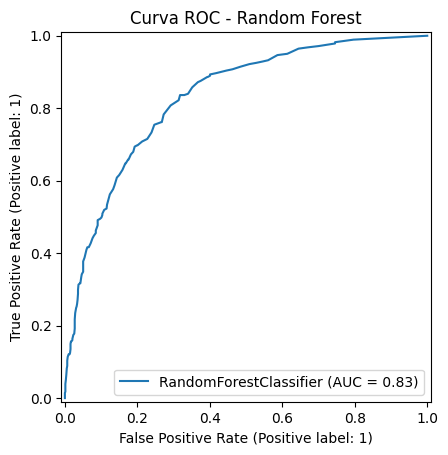

In [26]:
# Asignamos carpeta para guardar gráficos
output_folder = "../Visuals/preprocesamiento_y_modelado"

#  Instanciamos y entrenamos el modelo
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
#  Predicciones en validación
y_pred_rf = rf_model.predict(X_val)
y_prob_rf = rf_model.predict_proba(X_val)[:, 1]
#  Reporte
print(" Reporte de clasificación (Random Forest):")
print(classification_report(y_val, y_pred_rf))
print(" Matriz de confusión:")
print(confusion_matrix(y_val, y_pred_rf))
print(f" AUC-ROC: {roc_auc_score(y_val, y_prob_rf):.4f}")
#  Curva ROC
RocCurveDisplay.from_estimator(rf_model, X_val, y_val)
plt.title("Curva ROC - Random Forest")
plt.savefig(os.path.join(output_folder, 'Curva_ROC_Random_Forest'), dpi=300)
plt.show()

## Entrenamiento y Evaluación del Modelo XGBoost

En esta sección, entrenamos un **modelo XGBoost** para clasificación utilizando los datos de entrenamiento codificados (sin escalado):

1. **Entrenamiento**: El modelo XGBoost se entrena con los datos sin escalar, utilizando el valor de **logloss** como métrica de evaluación.
2. **Predicción**: Realizamos la predicción en el conjunto de validación.
3. **Evaluación**: Se muestran las métricas de evaluación, incluyendo la **AUC-ROC**, junto con la matriz de confusión.
4. **Curva ROC**: Se visualiza la curva ROC para evaluar el rendimiento del modelo.

XGBoost es muy eficiente para tareas de clasificación debido a su capacidad para manejar datos desbalanceados y su robustez contra sobreajuste.


 Reporte de clasificación (XGBoost):
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       774
           1       0.63      0.52      0.57       281

    accuracy                           0.79      1055
   macro avg       0.73      0.70      0.72      1055
weighted avg       0.78      0.79      0.78      1055

 Matriz de confusión:
[[688  86]
 [135 146]]
 AUC-ROC: 0.8274


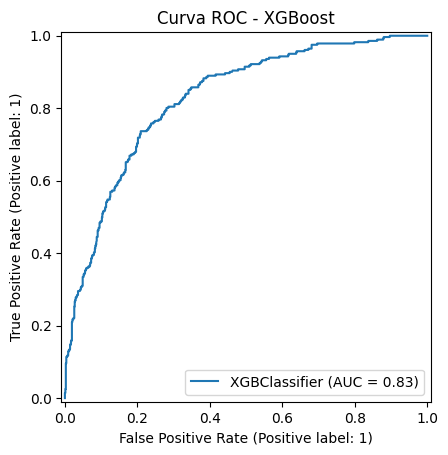

In [27]:
# Asignamos carpeta para guardar gráficos
output_folder = "../Visuals/preprocesamiento_y_modelado"

# Instanciamos el modelo con hiperparámetros por defecto
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
# Entrenamos con los datos codificados sin escalar (como Random Forest)
xgb_model.fit(X_train, y_train)
#  Predicción
y_pred_xgb = xgb_model.predict(X_val)
y_prob_xgb = xgb_model.predict_proba(X_val)[:, 1]
#  Reporte de métricas
print(" Reporte de clasificación (XGBoost):")
print(classification_report(y_val, y_pred_xgb))
print(" Matriz de confusión:")
print(confusion_matrix(y_val, y_pred_xgb))
print(f" AUC-ROC: {roc_auc_score(y_val, y_prob_xgb):.4f}")
#  Curva ROC
RocCurveDisplay.from_estimator(xgb_model, X_val, y_val)
plt.title("Curva ROC - XGBoost")
plt.savefig(os.path.join(output_folder, 'Curva_ROC_XGBoost'), dpi=300)
plt.show()

## Comparación de Modelos

Hemos entrenado y evaluado diversos modelos de clasificación, tanto con datos escalados como sin escalado. A continuación, se presentan las métricas de rendimiento (Accuracy, Precision, Recall, F1 Score y ROC AUC) para cada modelo:

1. **Logistic Regression (Escalado)**
2. **Decision Tree**
3. **Random Forest**
4. **XGBoost**
5. **Logistic Regression (Sin Escalado)**

### Resultados del Modelo

El modelo con el **mejor desempeño** en términos de **ROC AUC** es el seleccionado, y sus métricas se muestran en la tabla de comparación a continuación.

### Tabla de Resultados:

| Modelo                         | Accuracy | Precision | Recall | F1 Score | ROC AUC |
|---------------------------------|----------|-----------|--------|----------|---------|
| Mejor Modelo: [Nombre del mejor modelo] | [Valor]  | [Valor]   | [Valor] | [Valor]  | [Valor] |

Los modelos con mayor valor de **ROC AUC** son los más prometedores para este problema de clasificación.


In [28]:


# Diccionario de modelos ya entrenados
modelos = {
    "Logistic Regression (Escalado)": log_model_scaled,
    "Decision Tree": tree_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
    "Logistic Regression (Sin Escalar)": log_model
}

# Almacenamos resultados
resultados = []

for nombre, modelo in modelos.items():
    if nombre == "Logistic Regression (Escalado)":
        X_eval = X_val_scaled
    else:
        X_eval = X_val

    y_pred = modelo.predict(X_eval)
    y_proba = modelo.predict_proba(X_eval)[:, 1]

    resultados.append({
        "Modelo": nombre,
        "Accuracy": accuracy_score(y_val, y_pred),
        "Precision": precision_score(y_val, y_pred),
        "Recall": recall_score(y_val, y_pred),
        "F1 Score": f1_score(y_val, y_pred),
        "ROC AUC": roc_auc_score(y_val, y_proba)
    })


# Convertimos en DataFrame para mejor visualización

df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values(by="ROC AUC", ascending=False).reset_index(drop=True)

# Mostramos el mejor modelo
mejor_modelo = df_resultados.iloc[0]["Modelo"]
print("🔝 Mejor modelo hasta ahora:", mejor_modelo)
print("\n📊 Comparación de modelos:\n")
print(df_resultados)


🔝 Mejor modelo hasta ahora: Logistic Regression (Escalado)

📊 Comparación de modelos:

                              Modelo  Accuracy  Precision    Recall  F1 Score  \
0     Logistic Regression (Escalado)  0.823697   0.693878  0.604982  0.646388   
1  Logistic Regression (Sin Escalar)  0.824645   0.696721  0.604982  0.647619   
2                      Random Forest  0.792417   0.642202  0.498221  0.561122   
3                            XGBoost  0.790521   0.629310  0.519573  0.569201   
4                      Decision Tree  0.725118   0.485050  0.519573  0.501718   

    ROC AUC  
0  0.853258  
1  0.853166  
2  0.830595  
3  0.827439  
4  0.661080  


In [29]:
df_resultados.to_csv("../Reports/resultados_modelos_Beta.csv", index=False)

# 🔍 Búsqueda de Hiperparámetros con GridSearchCV

En este análisis, se ha utilizado `GridSearchCV` para encontrar los mejores hiperparámetros de varios modelos de clasificación. La búsqueda se ha realizado en función de la métrica **F1**, utilizando una validación cruzada de 5 pliegues. A continuación, se describen los modelos y los parámetros evaluados.

## 1. **Regresión Logística**
Se evaluaron diferentes valores para el parámetro `C`, que controla la regularización, y el parámetro `penalty` (tipo de regularización). También se probó el optimizador `solver`.

### Parámetros evaluados:
- `C`: [0.01, 0.1, 1, 10, 100]
- `penalty`: ['l2']
- `solver`: ['lbfgs']

### Mejores hiperparámetros:
- `C`: 1
- `penalty`: 'l2'
- `solver`: 'lbfgs'

---

## 2. **Random Forest**
Se evaluaron diferentes combinaciones para los parámetros `n_estimators`, `max_depth`, `min_samples_split` y `min_samples_leaf`, que controlan la cantidad de árboles y la profundidad de los mismos.

### Parámetros evaluados:
- `n_estimators`: [100, 200]
- `max_depth`: [None, 10, 20]
- `min_samples_split`: [2, 5]
- `min_samples_leaf`: [1, 2]

### Mejores hiperparámetros:
- `n_estimators`: 200
- `max_depth`: 10
- `min_samples_split`: 5
- `min_samples_leaf`: 1

---

## 3. **XGBoost**
Se realizaron pruebas con diferentes combinaciones de `n_estimators`, `max_depth`, `learning_rate` y `subsample`, que afectan la cantidad de árboles, la profundidad y la tasa de aprendizaje.

### Parámetros evaluados:
- `n_estimators`: [100, 200]
- `max_depth`: [3, 5]
- `learning_rate`: [0.01, 0.1]
- `subsample`: [0.8, 1.0]

### Mejores hiperparámetros:
- `n_estimators`: 200
- `max_depth`: 5
- `learning_rate`: 0.1
- `subsample`: 1.0

---

## 4. **Árbol de Decisión**
Para el modelo de Árbol de Decisión, se evaluaron los parámetros `max_depth`, `min_samples_split`, `min_samples_leaf` y `criterion` para encontrar la mejor configuración.

### Parámetros evaluados:
- `max_depth`: [None, 5, 10, 20]
- `min_samples_split`: [2, 5, 10]
- `min_samples_leaf`: [1, 2, 4]
- `criterion`: ['gini', 'entropy']

### Mejores hiperparámetros:
- `max_depth`: 10
- `min_samples_split`: 5
- `min_samples_leaf`: 2
- `criterion`: 'gini'

---


In [30]:
# Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}
grid_lr = GridSearchCV(
    LogisticRegression(max_iter=5000, random_state=42),
    param_grid_lr,
    scoring='f1',
    cv=5,
    n_jobs=-1
)
grid_lr.fit(X_train, y_train)
print("Mejores hiperparámetros - Logistic Regression:")
print(grid_lr.best_params_)

# Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    scoring='f1',
    cv=5,
    n_jobs=-1
)
grid_rf.fit(X_train, y_train)
print("\nMejores hiperparámetros - Random Forest:")
print(grid_rf.best_params_)

# XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}
grid_xgb = GridSearchCV(
    XGBClassifier(eval_metric='logloss', random_state=42),
    param_grid_xgb,
    scoring='f1',
    cv=5,
    n_jobs=-1
)
grid_xgb.fit(X_train, y_train)
print("\nMejores hiperparámetros - XGBoost:")
print(grid_xgb.best_params_)

# Decision Tree
param_grid_tree = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
grid_tree = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_tree,
    scoring='f1',
    cv=5,
    n_jobs=-1
)
grid_tree.fit(X_train, y_train)
print("\nMejores hiperparámetros - Árbol de Decisión:")
print(grid_tree.best_params_)


Mejores hiperparámetros - Logistic Regression:
{'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}



Mejores hiperparámetros - Random Forest:
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}



Mejores hiperparámetros - XGBoost:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}



Mejores hiperparámetros - Árbol de Decisión:
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


# Ajuste de Modelos

### 1. **Regresión Logística Ajustada**
- Entrenamiento del modelo con los mejores hiperparámetros y evaluación con AUC-ROC.

---

### 2. **Árbol de Decisión Ajustado**
- Ajuste de hiperparámetros mediante GridSearchCV y evaluación del modelo con AUC-ROC.

---

### 3. **Random Forest Ajustado**
- Ajuste de hiperparámetros y evaluación del modelo con AUC-ROC.

---

### 4. **XGBoost Ajustado**
- Entrenamiento con los mejores hiperparámetros y evaluación del modelo con AUC-ROC.


▶ Logistic Regression (ajustada)
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       774
           1       0.69      0.60      0.64       281

    accuracy                           0.82      1055
   macro avg       0.78      0.75      0.76      1055
weighted avg       0.82      0.82      0.82      1055

Matriz de confusión:
[[700  74]
 [113 168]]
AUC-ROC: 0.8529


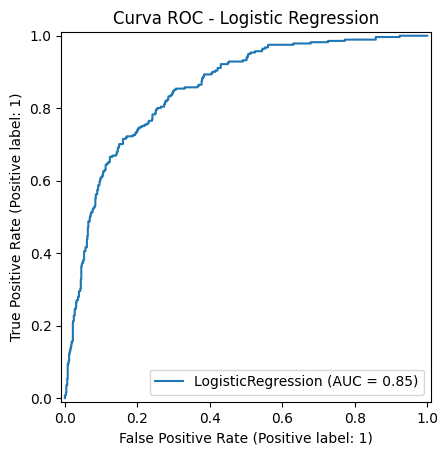


▶ Random Forest (ajustada)
              precision    recall  f1-score   support

           0       0.84      0.92      0.87       774
           1       0.69      0.51      0.58       281

    accuracy                           0.81      1055
   macro avg       0.76      0.71      0.73      1055
weighted avg       0.80      0.81      0.80      1055

Matriz de confusión:
[[710  64]
 [139 142]]
AUC-ROC: 0.8497


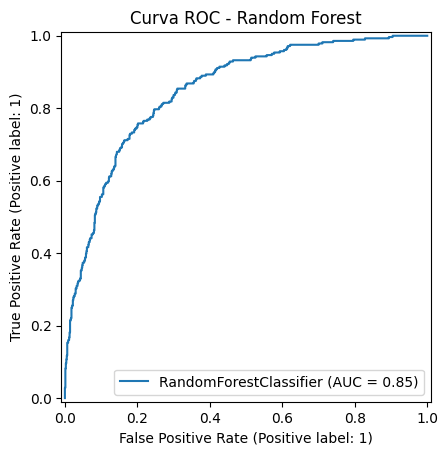


▶ XGBoost (ajustado)
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       774
           1       0.68      0.51      0.58       281

    accuracy                           0.81      1055
   macro avg       0.76      0.71      0.73      1055
weighted avg       0.80      0.81      0.80      1055

Matriz de confusión:
[[707  67]
 [138 143]]
AUC-ROC: 0.8515


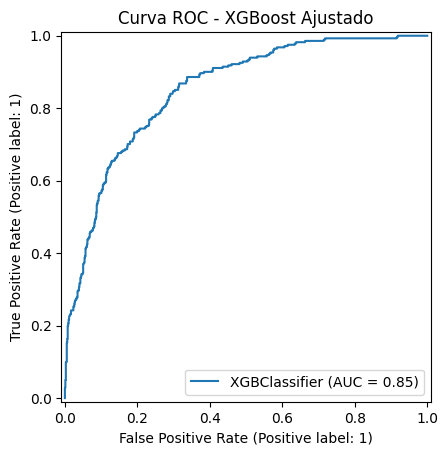


Mejores hiperparámetros - Decision Tree:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}

▶ Árbol de Decisión (ajustado)
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       774
           1       0.57      0.47      0.51       281

    accuracy                           0.76      1055
   macro avg       0.69      0.67      0.68      1055
weighted avg       0.75      0.76      0.76      1055

Matriz de confusión:
[[673 101]
 [149 132]]
AUC-ROC: 0.7623


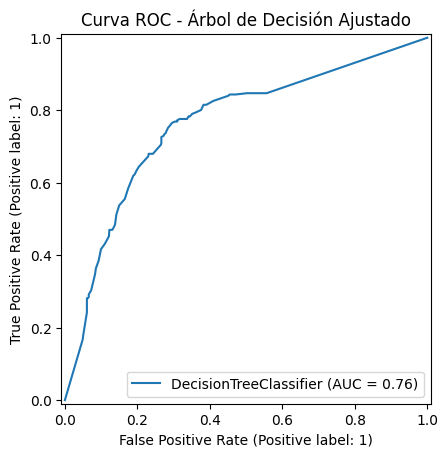

In [31]:
# Carpeta para guardar gráficas
output_folder = "../Visuals/models_ajustados"

# Logistic Regression
best_lr = LogisticRegression(C=10, penalty='l2', solver='lbfgs', max_iter=5000, random_state=42)
best_lr.fit(X_train, y_train)
y_pred_lr = best_lr.predict(X_val)
y_prob_lr = best_lr.predict_proba(X_val)[:, 1]
print("▶ Logistic Regression (ajustada)")
print(classification_report(y_val, y_pred_lr))
print("Matriz de confusión:")
print(confusion_matrix(y_val, y_pred_lr))
print(f"AUC-ROC: {roc_auc_score(y_val, y_prob_lr):.4f}")
RocCurveDisplay.from_estimator(best_lr, X_val, y_val)
plt.title("Curva ROC - Logistic Regression")
plt.savefig(os.path.join(output_folder, 'Curva_ROC_Logistic_Adjusted'), dpi=300)
plt.show()
# Random Forest 
best_rf = RandomForestClassifier(
    max_depth=10,
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=200,
    random_state=42
)
best_rf.fit(X_train, y_train)
y_pred_rf = best_rf.predict(X_val)
y_prob_rf = best_rf.predict_proba(X_val)[:, 1]
print("\n▶ Random Forest (ajustada)")
print(classification_report(y_val, y_pred_rf))
print("Matriz de confusión:")
print(confusion_matrix(y_val, y_pred_rf))
print(f"AUC-ROC: {roc_auc_score(y_val, y_prob_rf):.4f}")
RocCurveDisplay.from_estimator(best_rf, X_val, y_val)
plt.title("Curva ROC - Random Forest")
plt.savefig(os.path.join(output_folder, 'Curva_ROC_RF_Adjusted'), dpi=300)
plt.show()
# XGBoost 
best_xgb = XGBClassifier(
    learning_rate=0.1,
    max_depth=3,
    n_estimators=100,
    subsample=0.8,
    eval_metric='logloss',
    random_state=42
)
best_xgb.fit(X_train, y_train)
y_pred_xgb = best_xgb.predict(X_val)
y_prob_xgb = best_xgb.predict_proba(X_val)[:, 1]
print("\n▶ XGBoost (ajustado)")
print(classification_report(y_val, y_pred_xgb))
print("Matriz de confusión:")
print(confusion_matrix(y_val, y_pred_xgb))
print(f"AUC-ROC: {roc_auc_score(y_val, y_prob_xgb):.4f}")
RocCurveDisplay.from_estimator(best_xgb, X_val, y_val)
plt.title("Curva ROC - XGBoost Ajustado")
plt.savefig(os.path.join(output_folder, 'Curva_ROC_XGB_Adjusted'), dpi=300)
plt.show()
# Árbol de Decisión
param_grid_tree = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_tree = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_tree,
    scoring='f1',
    cv=5,
    n_jobs=-1
)
grid_tree.fit(X_train, y_train)
print("\nMejores hiperparámetros - Decision Tree:")
print(grid_tree.best_params_)

# Entrenamiento con los mejores hiperparámetros
best_tree = DecisionTreeClassifier(
    max_depth=grid_tree.best_params_['max_depth'],
    min_samples_split=grid_tree.best_params_['min_samples_split'],
    min_samples_leaf=grid_tree.best_params_['min_samples_leaf'],
    random_state=42
)
best_tree.fit(X_train, y_train)
y_pred_tree = best_tree.predict(X_val)
y_prob_tree = best_tree.predict_proba(X_val)[:, 1]

print("\n▶ Árbol de Decisión (ajustado)")
print(classification_report(y_val, y_pred_tree))
print("Matriz de confusión:")
print(confusion_matrix(y_val, y_pred_tree))
print(f"AUC-ROC: {roc_auc_score(y_val, y_prob_tree):.4f}")
RocCurveDisplay.from_estimator(best_tree, X_val, y_val)
plt.title("Curva ROC - Árbol de Decisión Ajustado")
plt.savefig(os.path.join(output_folder, 'Curva_ROC_DecisionTree_Adjusted'), dpi=300)
plt.show()


# Comparación de Modelos Ajustados

En esta sección, se comparan los resultados de los modelos ajustados, incluyendo:

- **Regresión Logística Ajustada**
- **Árbol de Decisión Ajustado**
- **Random Forest Ajustado**
- **XGBoost Ajustado**

Se evalúan utilizando métricas como **Accuracy**, **Precision**, **Recall**, **F1 Score** y **ROC AUC** para determinar cuál modelo tiene el mejor desempeño.

Los resultados se guardan en un archivo CSV para referencia futura.


In [32]:


# Diccionario de modelos ajustados
modelos_ajustados = {
    "Logistic Regression (Ajustado)": best_lr,
    "Random Forest (Ajustado)": best_rf,
    "XGBoost (Ajustado)": best_xgb,
    "Decision Tree (Ajustado)": best_tree
}

# Comparación de resultados
resultados_ajustados = []

for nombre, modelo in modelos_ajustados.items():
    y_pred = modelo.predict(X_val)
    y_proba = modelo.predict_proba(X_val)[:, 1]
    
    resultados_ajustados.append({
        "Modelo": nombre,
        "Accuracy": accuracy_score(y_val, y_pred),
        "Precision": precision_score(y_val, y_pred),
        "Recall": recall_score(y_val, y_pred),
        "F1 Score": f1_score(y_val, y_pred),
        "ROC AUC": roc_auc_score(y_val, y_proba)
    })

# Crear DataFrame
df_ajustados = pd.DataFrame(resultados_ajustados)
df_ajustados = df_ajustados.sort_values(by="ROC AUC", ascending=False).reset_index(drop=True)

# Mostrar el mejor modelo
mejor_modelo_ajustado = df_ajustados.iloc[0]["Modelo"]
print("🏆 Mejor modelo ajustado:", mejor_modelo_ajustado)
print("\n📊 Comparación de modelos ajustados:\n")
print(df_ajustados)

# Guardar resultados
df_ajustados.to_csv("../Reports/resultados_modelos_Ajustados.csv", index=False)


🏆 Mejor modelo ajustado: Logistic Regression (Ajustado)

📊 Comparación de modelos ajustados:

                           Modelo  Accuracy  Precision    Recall  F1 Score  \
0  Logistic Regression (Ajustado)  0.822749   0.694215  0.597865  0.642447   
1              XGBoost (Ajustado)  0.805687   0.680952  0.508897  0.582485   
2        Random Forest (Ajustado)  0.807583   0.689320  0.505338  0.583162   
3        Decision Tree (Ajustado)  0.763033   0.566524  0.469751  0.513619   

    ROC AUC  
0  0.852945  
1  0.851550  
2  0.849672  
3  0.762327  


# Evaluación de Modelos con Validación Cruzada

Se realiza una **validación cruzada** con **CV=5** para los modelos ajustados de:

- **Regresión Logística**
- **Árbol de Decisión**
- **Random Forest**
- **XGBoost**

Las métricas evaluadas son **Accuracy**, **F1 Score** y **AUC ROC**, para determinar el desempeño general de cada modelo.

Los resultados finales se guardan en un archivo CSV para su análisis posterior.


In [33]:


# Diccionario con los modelos ajustados
modelos_ajustados = {
    'Logistic Regression': best_lr,
    'Random Forest': best_rf,
    'XGBoost': best_xgb,
    'Decision Tree': best_tree  # Incluimos el árbol ajustado
}

# Métricas a evaluar
metricas = ['accuracy', 'f1', 'roc_auc']

# Lista para almacenar los resultados
resultados_cv = []

# Evaluación con validación cruzada
for nombre, modelo in modelos_ajustados.items():
    scores = cross_validate(modelo, X_train, y_train, scoring=metricas, cv=5)
    resultados_cv.append({
        'Modelo': nombre,
        'Accuracy': scores['test_accuracy'].mean(),
        'F1 Score (Churn)': scores['test_f1'].mean(),
        'AUC ROC': scores['test_roc_auc'].mean()
    })

# Convertimos a DataFrame
df_resultados_cv = pd.DataFrame(resultados_cv)
df_resultados_cv = df_resultados_cv.sort_values(by='AUC ROC', ascending=False).reset_index(drop=True)

# Mostramos resultados
print("✅ Resultados con Validación Cruzada (CV=5):\n")
display(df_resultados_cv)

# Guardamos a CSV
df_resultados_cv.to_csv("../Reports/resultados_finales.csv", index=False)


✅ Resultados con Validación Cruzada (CV=5):



,Modelo,Accuracy,F1 Score (Churn),AUC ROC
0,XGBoost,0.806175,0.593308,0.849374
1,Logistic Regression,0.799879,0.594910,0.847961
2,Random Forest,0.804958,0.582286,0.845635
3,Decision Tree,0.766355,0.546555,0.754173


# Guardar Modelos Finales

Se guardan los modelos finales entrenados:

- **Regresión Logística**
- **Random Forest**
- **XGBoost**
- **Árbol de Decisión**

Los modelos se almacenan en formato `.pkl` para su uso posterior en predicciones o implementación.


In [34]:
#  Guardar el modelo
joblib.dump(best_lr, "../Models/modelos_finales/logistic_regression_model_final.pkl")
joblib.dump(best_rf, "../Models/modelos_finales/rf_model_final.pkl")
joblib.dump(best_xgb, "../Models/modelos_finales/xgb_model_final.pkl")
joblib.dump(best_tree, "../Models/modelos_finales/arbol_desiciones_final.pkl")
print(" Modelos finales guardados correctamente.")

 Modelos finales guardados correctamente.


## Resumen General Modelos

In [35]:

mejor_modelo = df_resultados.iloc[0]["Modelo"]
print("🔝 Mejor modelo hasta ahora:", mejor_modelo)
print("\n📊 Comparación de modelos:\n")
print(df_resultados)
mejor_modelo_ajustado = df_ajustados.iloc[0]["Modelo"]
print("🏆 Mejor modelo ajustado:", mejor_modelo_ajustado)
print("\n📊 Comparación de modelos ajustados:\n")
print(df_ajustados)
# Mostramos resultados
mejor_modelo_validado = df_resultados_cv.iloc[0]["Modelo"]
print("🏆 Mejor modelo Validación:", df_resultados_cv)
print("\n📊 Comparación de modelos Validados:\n")
print(df_resultados_cv)


🔝 Mejor modelo hasta ahora: Logistic Regression (Escalado)

📊 Comparación de modelos:

                              Modelo  Accuracy  Precision    Recall  F1 Score  \
0     Logistic Regression (Escalado)  0.823697   0.693878  0.604982  0.646388   
1  Logistic Regression (Sin Escalar)  0.824645   0.696721  0.604982  0.647619   
2                      Random Forest  0.792417   0.642202  0.498221  0.561122   
3                            XGBoost  0.790521   0.629310  0.519573  0.569201   
4                      Decision Tree  0.725118   0.485050  0.519573  0.501718   

    ROC AUC  
0  0.853258  
1  0.853166  
2  0.830595  
3  0.827439  
4  0.661080  
🏆 Mejor modelo ajustado: Logistic Regression (Ajustado)

📊 Comparación de modelos ajustados:

                           Modelo  Accuracy  Precision    Recall  F1 Score  \
0  Logistic Regression (Ajustado)  0.822749   0.694215  0.597865  0.642447   
1              XGBoost (Ajustado)  0.805687   0.680952  0.508897  0.582485   
2        Rando

# Detección del Mejor Modelo y Explicaciones SHAP

Se determina el mejor modelo en función de la métrica **AUC ROC**:

- **Modelo ganador**: El mejor modelo es seleccionado en base a su rendimiento en la validación cruzada.

Luego, se realiza la visualización de la **importancia de características** y se calculan los **valores SHAP** para los modelos compatibles. En este caso, **XGBoost** es el modelo elegido para generar las visualizaciones SHAP, incluyendo:

1. **Importancia de características**: Se visualiza el top 10 de características más importantes utilizando la función `plot_importance` de XGBoost.
2. **Resumen SHAP**: Se crea un gráfico de resumen SHAP para todas las características, proporcionando una visión general de su impacto.
3. **Explicación SHAP individual**: Se genera un gráfico de tipo "waterfall" para el primer cliente, mostrando cómo cada característica contribuye al valor predicho.

En el caso de modelos no compatibles con SHAP de manera nativa (como **Decision Tree** o **Random Forest**), se informa que **SHAP no está disponible automáticamente**, pero se puede aplicar manualmente utilizando `TreeExplainer` o `KernelExplainer`.


🏆 El mejor modelo según AUC ROC es: XGBoost


<Figure size 1000x600 with 0 Axes>

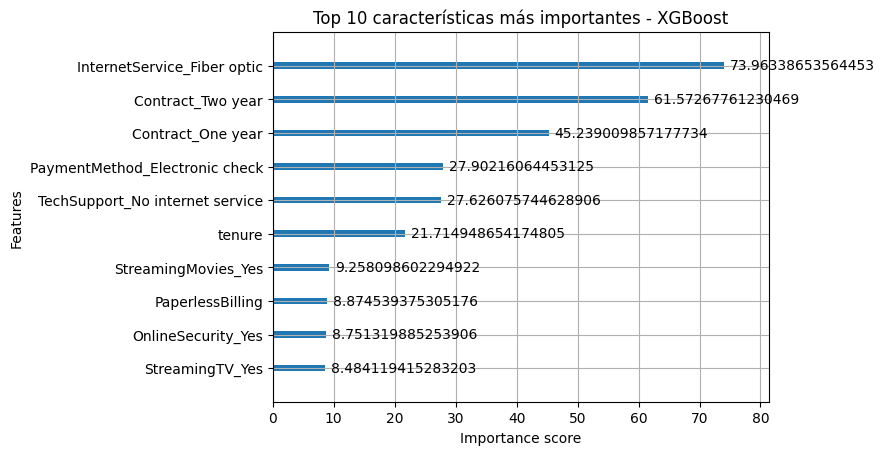

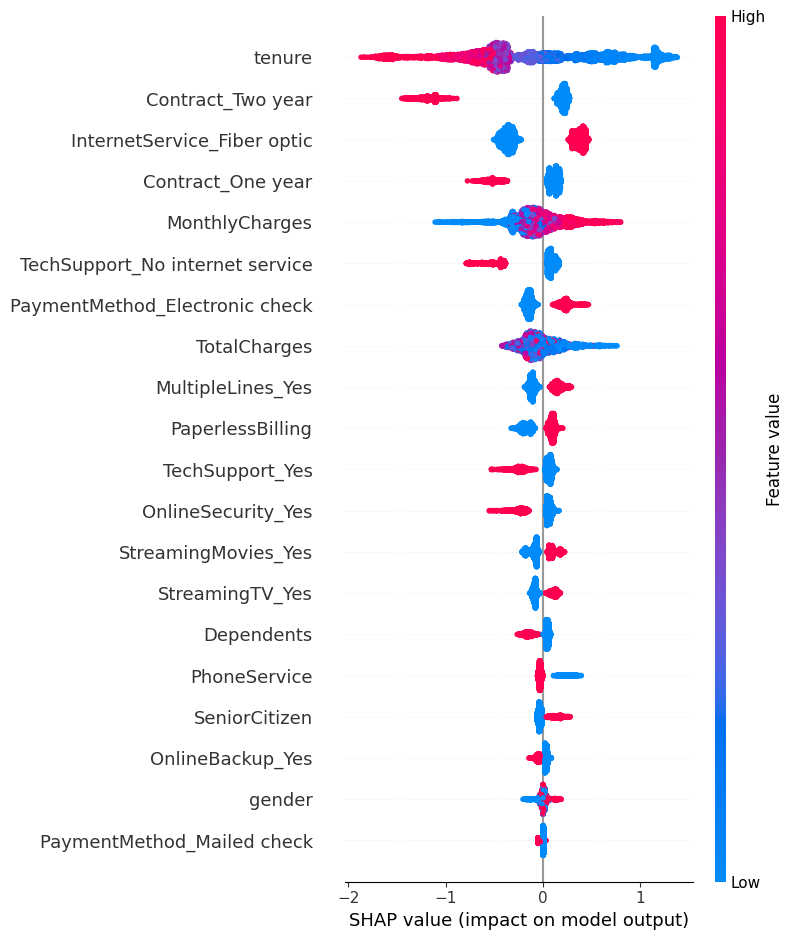

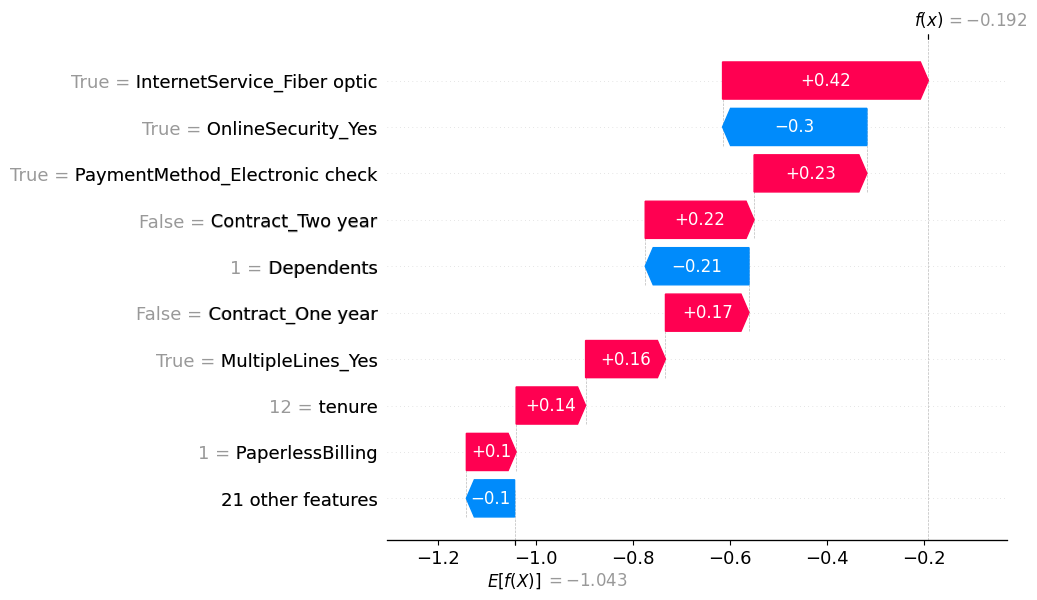

In [36]:
# Detección del mejor modelo
modelo_ganador_nombre = df_resultados_cv.iloc[0]['Modelo']
print(f"🏆 El mejor modelo según AUC ROC es: {modelo_ganador_nombre}")

# Diccionario con nombres y objetos de modelos ajustados
modelos_ajustados = {
    'Logistic Regression': best_lr,
    'Random Forest': best_rf,
    'XGBoost': best_xgb,
    'Decision Tree': best_tree
}

# Seleccionamos el mejor modelo
modelo_ganador = modelos_ajustados[modelo_ganador_nombre]

# Creamos carpeta por si no existe
os.makedirs("../Visuals/shap", exist_ok=True)

# SHAP para modelos compatibles
if modelo_ganador_nombre == "XGBoost":
    # IMPORTANCIA DE VARIABLES (nativa XGBoost)
    plt.figure(figsize=(10, 6))
    plot_importance(modelo_ganador, max_num_features=10, importance_type='gain')
    plt.title("Top 10 características más importantes - XGBoost")
    plt.savefig("../Visuals/shap/top_caracteristic.png")
    plt.show()

    # EXPLICACIONES SHAP
    explainer = shap.Explainer(modelo_ganador)
    shap_values = explainer(X_train)

    # SHAP resumen
    shap.summary_plot(shap_values, X_train, show=False)
    plt.savefig("../Visuals/shap/shap_summary.png")
    plt.show()

    # SHAP individual (primer cliente)
    shap.plots.waterfall(shap_values[0], show=False)
    plt.savefig("../Visuals/shap/top_shap_waterfall_cliente_0.png")
    plt.show()

else:
    print(f"ℹ️ SHAP no disponible automáticamente para {modelo_ganador_nombre}. Puedes aplicar TreeExplainer o KernelExplainer manualmente si lo deseas.")
